# Project 1- Clustering

## **Introduction:**

In the realm of customer-centric businesses, understanding and categorizing customer behavior is paramount for effective decision-making and strategic planning. This project delves into the application of clustering algorithms—specifically, K-Means, Agglomerative, and DBSCAN—on a dataset derived from a customer-oriented context. The aim is to unravel patterns within customer data, ultimately assisting in customer segmentation and tailored engagement strategies.

**Dataset Overview:**

The dataset comprises 88,810 entries across 11 dimensions, each offering unique insights into customer interactions and characteristics. Here's a breakdown of the dataset columns:

1. **Customer_ID:** A unique identifier for each customer in the dataset.

2. **Customer_Status:** Indicates the current engagement status of the customer with the company—whether they are an active customer or not.

3. **Old_Class:** Reflects the customer's class from the previous year, providing historical context.

4. **Geographical_ID:** A unique identifier assigned to a geographical location for each customer, facilitating regional analysis.

5. **CustCreationDate:** Marks the creation date of the customer ID, signifying the initial interaction with the customer.

6. **Net_Purchase(IRR):** Represents the amount of money spent on goods purchased for resale, accounting for discounts.

7. **Avg_Invoice_Row_No:** The average number of rows in an invoice, calculated by dividing the total number of rows in all invoices by the number of invoices.

8. **Waste_Rate:** Indicates the amount of waste generated by a customer, calculated as the ratio of total waste weight to total purchase weight.

9. **Rejected_Rate:** Represents the percentage of items returned by customers, calculated by dividing the total number of returned items by the total number of items sold.

10. **Avg_Purchase_In_Month:** Signifies the average number of invoices made by a customer in a month, providing insights into purchasing frequency.

11. **Date_Of_Last_Purchase:** Denotes the date of the last purchase made by the customer, offering a temporal dimension to customer interactions.

This diverse set of features encapsulates various aspects of customer behavior, enabling a comprehensive analysis of their engagement patterns, purchasing habits, and historical interactions with the company. As we delve into the comparison of clustering algorithms, these attributes will be instrumental in unraveling distinct customer segments and deriving meaningful insights for strategic decision-making.

## Aim:

The primary aim of this report is to employ clustering algorithms— specifically, K-Means, Agglomerative, and DBSCAN—to gain nuanced insights into customer behavior within a business context. The analysis aims to uncover distinct customer segments based on a diverse set of features provided in the dataset. Through this exploration, we strive to enhance our understanding of customer engagement patterns and preferences, ultimately contributing to informed decision-making in customer relationship management.

## Objectives: 

1. **Size of Clustering:**
Investigate the sizes of clusters generated by K-Means, Agglomerative, and DBSCAN algorithms. Analyze the distribution of customers across these clusters to understand the prevalence of different customer segments. Utilize visual aids such as histograms or pie charts to illustrate the variations in cluster sizes and identify any patterns or outliers.

2. **Comparison on Memory and Time Taken:**
Conduct a detailed analysis of the computational efficiency of each clustering algorithm by comparing memory usage and processing time. Evaluate the trade-offs between accuracy and computational resources to identify the algorithm that provides optimal performance. Present the findings through tables or charts, highlighting key differences in resource requirements.

3. **Composition of Each Cluster:**
Explore the composition of clusters generated by K-Means, Agglomerative, and DBSCAN, focusing on the distinctive characteristics of customers within each segment. Examine features such as purchasing behavior, historical engagement, and geographical location within each cluster. Provide descriptive statistics and visual representations to convey the unique traits of customers in different clusters, aiding in the interpretation of meaningful customer segments.


## K-Means Clustering:

### Overview:
K-Means is a popular unsupervised machine learning algorithm used for clustering, a process of grouping similar data points into distinct clusters. The objective is to minimize the variance within each cluster and maximize the variance between clusters. K-Means is iterative and relies on the concept of centroids, where each cluster is represented by a central point, or centroid.

### How K-Means Works:

1. **Initialization:**
K-Means begins by randomly selecting K centroids, where K is the predetermined number of clusters. These centroids serve as the initial centers for the clusters.

2. **Assignment:**
Each data point is assigned to the nearest centroid based on a distance metric, commonly the Euclidean distance. This step forms the initial clusters.

3. **Update Centroids:**
The centroids are recalculated as the mean of all data points within each cluster. This process continues until convergence.

4. **Reassignment:**
Data points are reassigned to the nearest centroid based on the updated centroids. Steps 3 and 4 iteratively continue until the centroids no longer change significantly, indicating convergence.


### Advantages of K-Means:

1. **Simplicity and Speed:**
K-Means is computationally efficient and simple to implement, making it suitable for large datasets and real-time applications.

2. **Scalability:**
The algorithm scales well with the number of data points, making it applicable to datasets of varying sizes.

3. **Versatility:**
K-Means can handle different types of data and is not sensitive to the shape of clusters.

4. **Interpretability:**
The results are easy to interpret, as each cluster is represented by its centroid, providing a clear understanding of the grouping.


### Disadvantages of K-Means:

1. **Sensitivity to Initial Centroids:**
The algorithm's outcome can be sensitive to the initial placement of centroids, potentially resulting in different solutions.

2. **Assumes Spherical Clusters:**
K-Means assumes that clusters are spherical, equally sized, and have similar variances. It may struggle with non-linear or irregularly shaped clusters.

3. **Fixed Number of Clusters (K):**
The user must specify the number of clusters beforehand (K), which might be challenging in situations where the optimal K is unknown.

4. **Sensitive to Outliers:**
Outliers can significantly impact the centroid calculation, leading to suboptimal cluster assignments.

In [4]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")

In [5]:
pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:.2f}'.format
data = pd.read_csv("C:\\Users\\DELL\\Downloads\\Customer_Data.csv", parse_dates=['CustCreationDate', 'Date_Of_Last_ Purchase'])
data

Customer_ID Customer_Status Old_Class  Geographical_ID  \
0           100001          Active         C                1   
1           100002          Active         C                1   
2           100003          Active         C                1   
3           100004          Active         C                1   
4           100005        Inactive         C                2   
...            ...             ...       ...              ...   
88805       188806          Active         C                5   
88806       188807          Active         C               18   
88807       188808          Active         C               18   
88808       188809          Active         C               18   
88809       188810          Active         C               19   

      CustCreationDate  Net_ Purchase(IRR)  Avg_Invoice_Row_No  Waste_Rate  \
0           07-03-2019                0.00                0.00        0.00   
1           09-03-2019                0.00                0.00        0.00   
2           07-05-2019                0.00                0.00        0.00   
3           15-05-2019                0.00                0.00        0.00   
4           21-05-2019                0.00                0.00        0.00   
...                ...                 ...                 ...         ...   
88805       27-11-2021                0.00                0.00        0.00   
88806       27-11-2021                0.00                0.00        0.00   
88807       27-11-2021                0.00                0.00        0.00   
88808       27-11-2021                0.00                0.00        0.00   
88809       27-11-2021                0.00                0.00        0.00   

       Rejected_Rate  Avg_Purchase_In_Month Date_Of_Last_ Purchase  
0               0.00                      0             11-01-2020  
1               0.00                      0             11-02-2020  
2               0.00                      0             29-02-2020  
3               0.00                      0             01-03-2020  
4               0.00                      0             09-02-2020  
...              ...                    ...                    ...  
88805           0.00                      0             03-02-2022  
88806           0.00                      0             03-02-2022  
88807           0.00                      0             03-02-2022  
88808           0.00                      0             03-02-2022  
88809           0.00                      0             03-02-2022  

[88810 rows x 11 columns]

In [6]:
data.shape

(88810, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88810 entries, 0 to 88809
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             88810 non-null  int64  
 1   Customer_Status         88810 non-null  object 
 2   Old_Class               88810 non-null  object 
 3   Geographical_ID         88810 non-null  int64  
 4   CustCreationDate        88810 non-null  object 
 5   Net_ Purchase(IRR)      88810 non-null  float64
 6   Avg_Invoice_Row_No      88810 non-null  float64
 7   Waste_Rate              88810 non-null  float64
 8   Rejected_Rate           88810 non-null  float64
 9   Avg_Purchase_In_Month   88810 non-null  int64  
 10  Date_Of_Last_ Purchase  88591 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 7.5+ MB


In [8]:
drop_columns=["Customer_ID","Geographical_ID", "Old_Class"]
data.drop(drop_columns,axis=1,inplace=True)
data.sample(5)

Customer_Status CustCreationDate  Net_ Purchase(IRR)  \
32183          Active       10-07-2019        324529139.80   
25818          Active       03-07-2019         82828608.36   
88424          Active       09-11-2021                0.00   
60438        Inactive       16-08-2019          1405594.92   
49828          Active       03-08-2019         74700269.28   

       Avg_Invoice_Row_No  Waste_Rate  Rejected_Rate  Avg_Purchase_In_Month  \
32183               15.30        0.01           0.17                     13   
25818               14.17        0.05           0.00                      6   
88424                0.00        0.00           0.00                      0   
60438                1.70        0.00           0.00                      2   
49828                5.95        0.00           2.15                     15   

      Date_Of_Last_ Purchase  
32183             10-05-2021  
25818             08-01-2022  
88424             29-01-2022  
60438             27-05-2021  
49828             22-01-2022

In [9]:
data["Customer_Status"].value_counts()
data=data[data["Customer_Status"]=="Active"]
data

Customer_Status CustCreationDate  Net_ Purchase(IRR)  \
0              Active       07-03-2019                0.00   
1              Active       09-03-2019                0.00   
2              Active       07-05-2019                0.00   
3              Active       15-05-2019                0.00   
5              Active       29-05-2019                0.00   
...               ...              ...                 ...   
88805          Active       27-11-2021                0.00   
88806          Active       27-11-2021                0.00   
88807          Active       27-11-2021                0.00   
88808          Active       27-11-2021                0.00   
88809          Active       27-11-2021                0.00   

       Avg_Invoice_Row_No  Waste_Rate  Rejected_Rate  Avg_Purchase_In_Month  \
0                    0.00        0.00           0.00                      0   
1                    0.00        0.00           0.00                      0   
2                    0.00        0.00           0.00                      0   
3                    0.00        0.00           0.00                      0   
5                    0.00        0.00           0.00                      0   
...                   ...         ...            ...                    ...   
88805                0.00        0.00           0.00                      0   
88806                0.00        0.00           0.00                      0   
88807                0.00        0.00           0.00                      0   
88808                0.00        0.00           0.00                      0   
88809                0.00        0.00           0.00                      0   

      Date_Of_Last_ Purchase  
0                 11-01-2020  
1                 11-02-2020  
2                 29-02-2020  
3                 01-03-2020  
5                 22-01-2020  
...                      ...  
88805             03-02-2022  
88806             03-02-2022  
88807             03-02-2022  
88808             03-02-2022  
88809             03-02-2022  

[68529 rows x 8 columns]

In [10]:
print(data.shape)
data.dropna(inplace=True)
data.shape

(68529, 8)


(68488, 8)

In [11]:
data.describe().T

count         mean           std           min  \
Net_ Purchase(IRR)    68488.00 581019938.72 1282378788.65 -209812225.70   
Avg_Invoice_Row_No    68488.00        11.78          8.87          0.00   
Waste_Rate            68488.00         0.17         21.65         -0.42   
Rejected_Rate         68488.00         0.98        140.28         -3.19   
Avg_Purchase_In_Month 68488.00        36.16         26.02          0.00   

                               25%          50%          75%            max  
Net_ Purchase(IRR)    117715881.85 293442648.45 670991555.75 96518929414.00  
Avg_Invoice_Row_No            6.94         9.90        14.35         421.60  
Waste_Rate                    0.00         0.02         0.06        4477.80  
Rejected_Rate                 0.00         0.03         0.16       35374.32  
Avg_Purchase_In_Month        17.00        33.00        51.00         900.00

In [12]:
data=data[data["Net_ Purchase(IRR)"]>=0]
data=data[data["Waste_Rate"]>=0]
data=data[data["Rejected_Rate"]>=0]
data.shape

(68483, 8)

In [13]:
import pandas as pd

# Assuming "CustCreationDate" is in the format "15-05-2019"
data["CustCreationDate"] = pd.to_datetime(data["CustCreationDate"], format="%d-%m-%Y")

# Calculate age based on CustCreationDate
data["age"] = (pd.to_datetime("now") - data["CustCreationDate"]).dt.days

# Display the "age" column
print(data["age"])

0        1825
1        1823
2        1764
3        1756
5        1742
         ... 
88805     829
88806     829
88807     829
88808     829
88809     829
Name: age, Length: 68483, dtype: int64


In [14]:
import pandas as pd

# Convert "Date_Of_Last_Purchase" to datetime objects
data["Date_Of_Last_ Purchase"] = pd.to_datetime(data["Date_Of_Last_ Purchase"], format="%d-%m-%Y")

# Calculate recency based on Date_Of_Last_Purchase
data["recency"] = (pd.to_datetime("now") - data["Date_Of_Last_ Purchase"]).dt.days

# Display the "recency" column
print(data["recency"])


0        1515
1        1484
2        1466
3        1465
5        1504
         ... 
88805     761
88806     761
88807     761
88808     761
88809     761
Name: recency, Length: 68483, dtype: int64


In [15]:
data.drop(["Date_Of_Last_ Purchase","CustCreationDate","Customer_Status"],axis=1,inplace=True)
data.sample(2)

Net_ Purchase(IRR)  Avg_Invoice_Row_No  Waste_Rate  Rejected_Rate  \
21991        584958026.60                8.60        0.12           0.02   
80396        215674618.70                8.50        0.00           0.00   

       Avg_Purchase_In_Month   age  recency  
21991                     99  1719      762  
80396                     26  1197      762

In [16]:
data.describe()

Net_ Purchase(IRR)  Avg_Invoice_Row_No  Waste_Rate  Rejected_Rate  \
count            68483.00            68483.00    68483.00       68483.00   
mean         581069704.22               11.78        0.17           0.98   
std         1282412180.59                8.87       21.65         140.29   
min                  0.00                0.00        0.00           0.00   
25%          117760100.75                6.94        0.00           0.00   
50%          293489696.30                9.90        0.02           0.03   
75%          671023926.05               14.35        0.06           0.16   
max        96518929414.00              421.60     4477.80       35374.32   

       Avg_Purchase_In_Month      age  recency  
count               68483.00 68483.00 68483.00  
mean                   36.16  1608.90   803.66  
std                    26.02   236.34    95.37  
min                     0.00   829.00   760.00  
25%                    17.00  1656.00   764.00  
50%                    33.00  1680.00   770.00  
75%                    51.00  1719.00   787.00  
max                   900.00  1857.00  1525.00

In [17]:
len(data["Waste_Rate"][data["Waste_Rate"]>1].value_counts())
len(data["Rejected_Rate"][data["Rejected_Rate"]>1].value_counts())
data=data[data["Waste_Rate"]<=1]
data=data[data["Rejected_Rate"]<=1]
data.shape

(66122, 7)

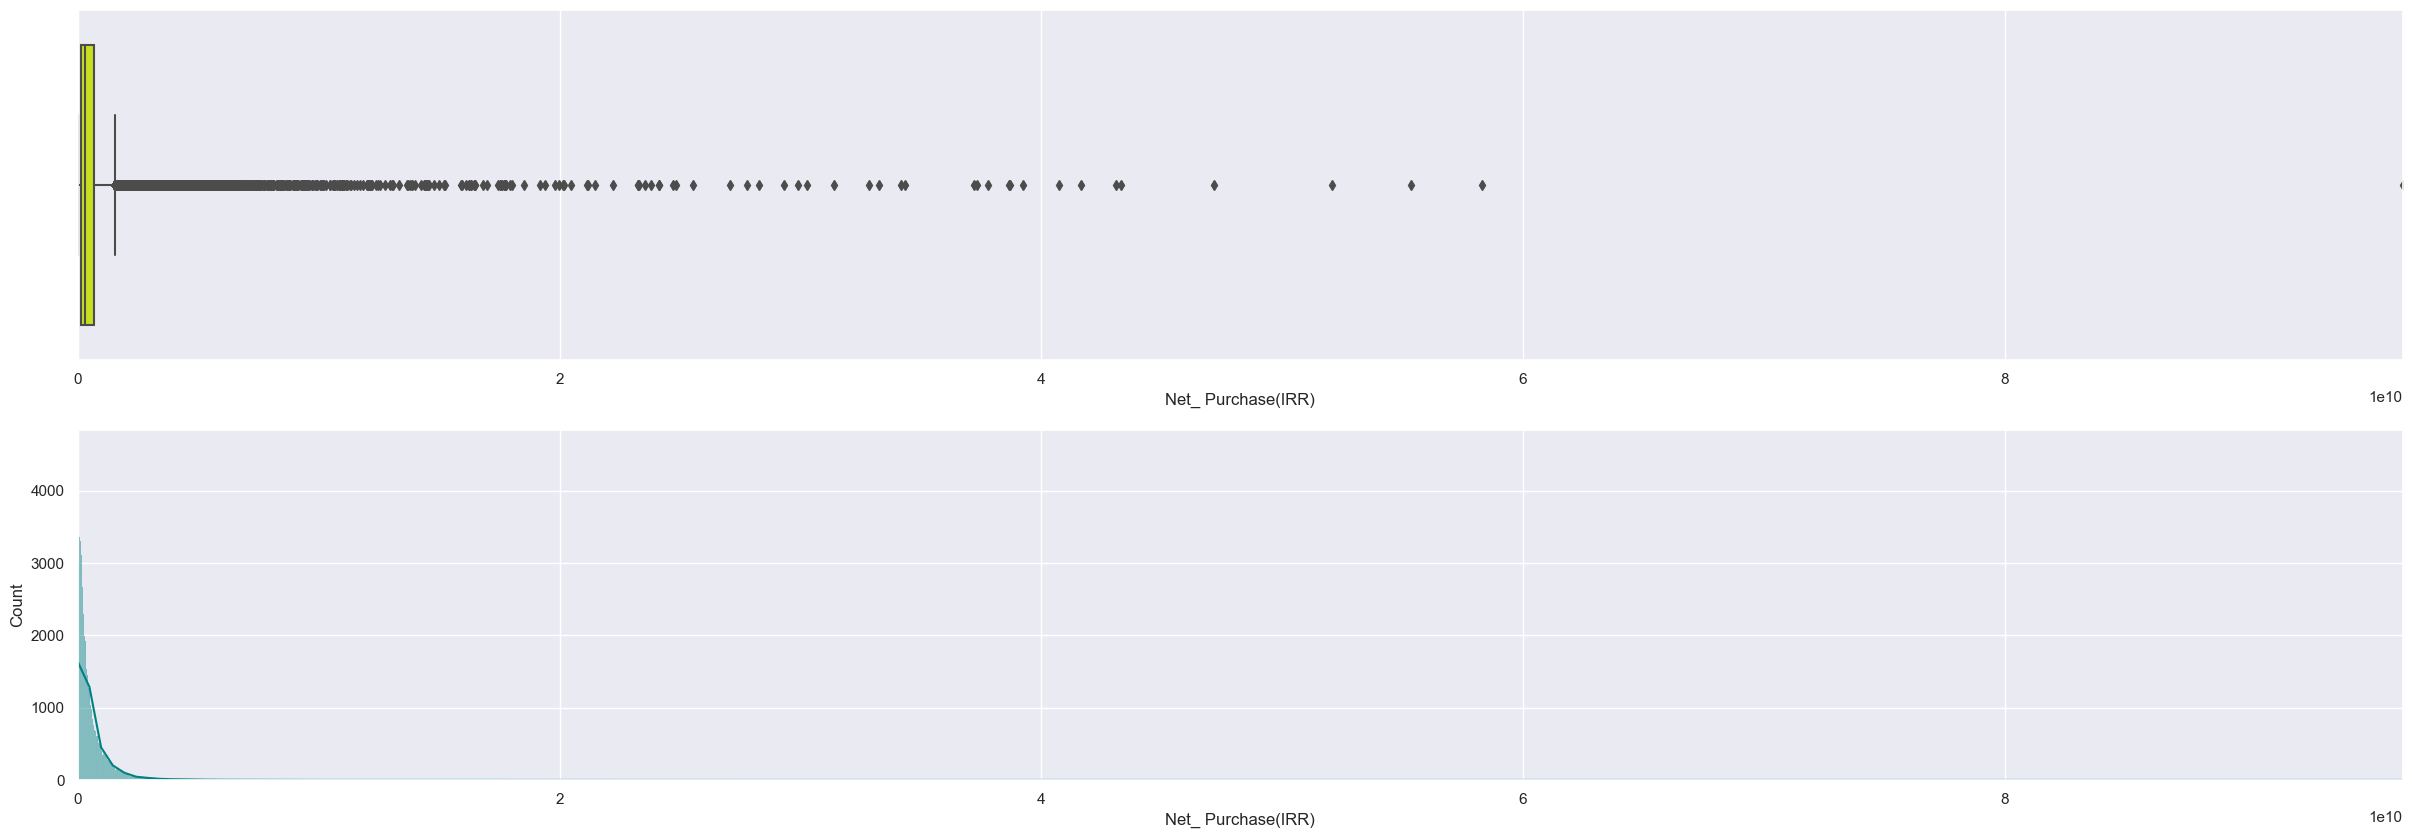

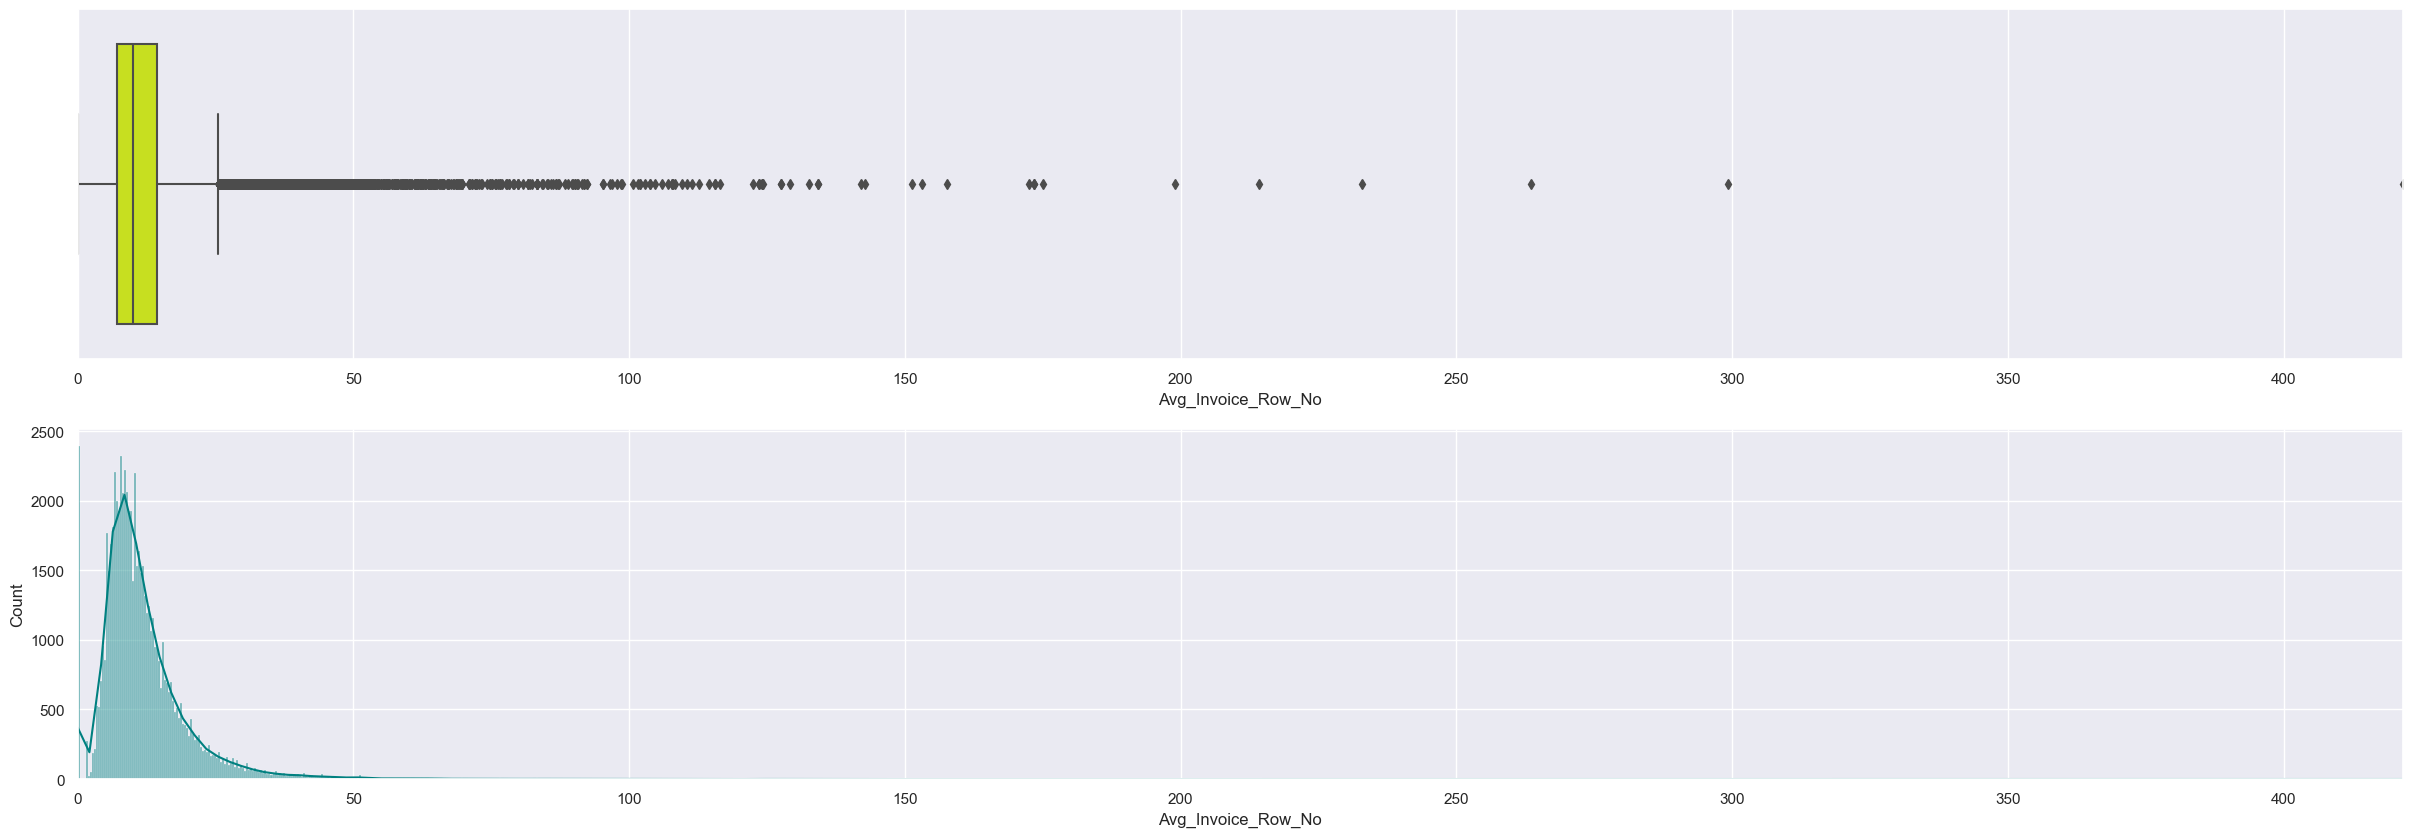

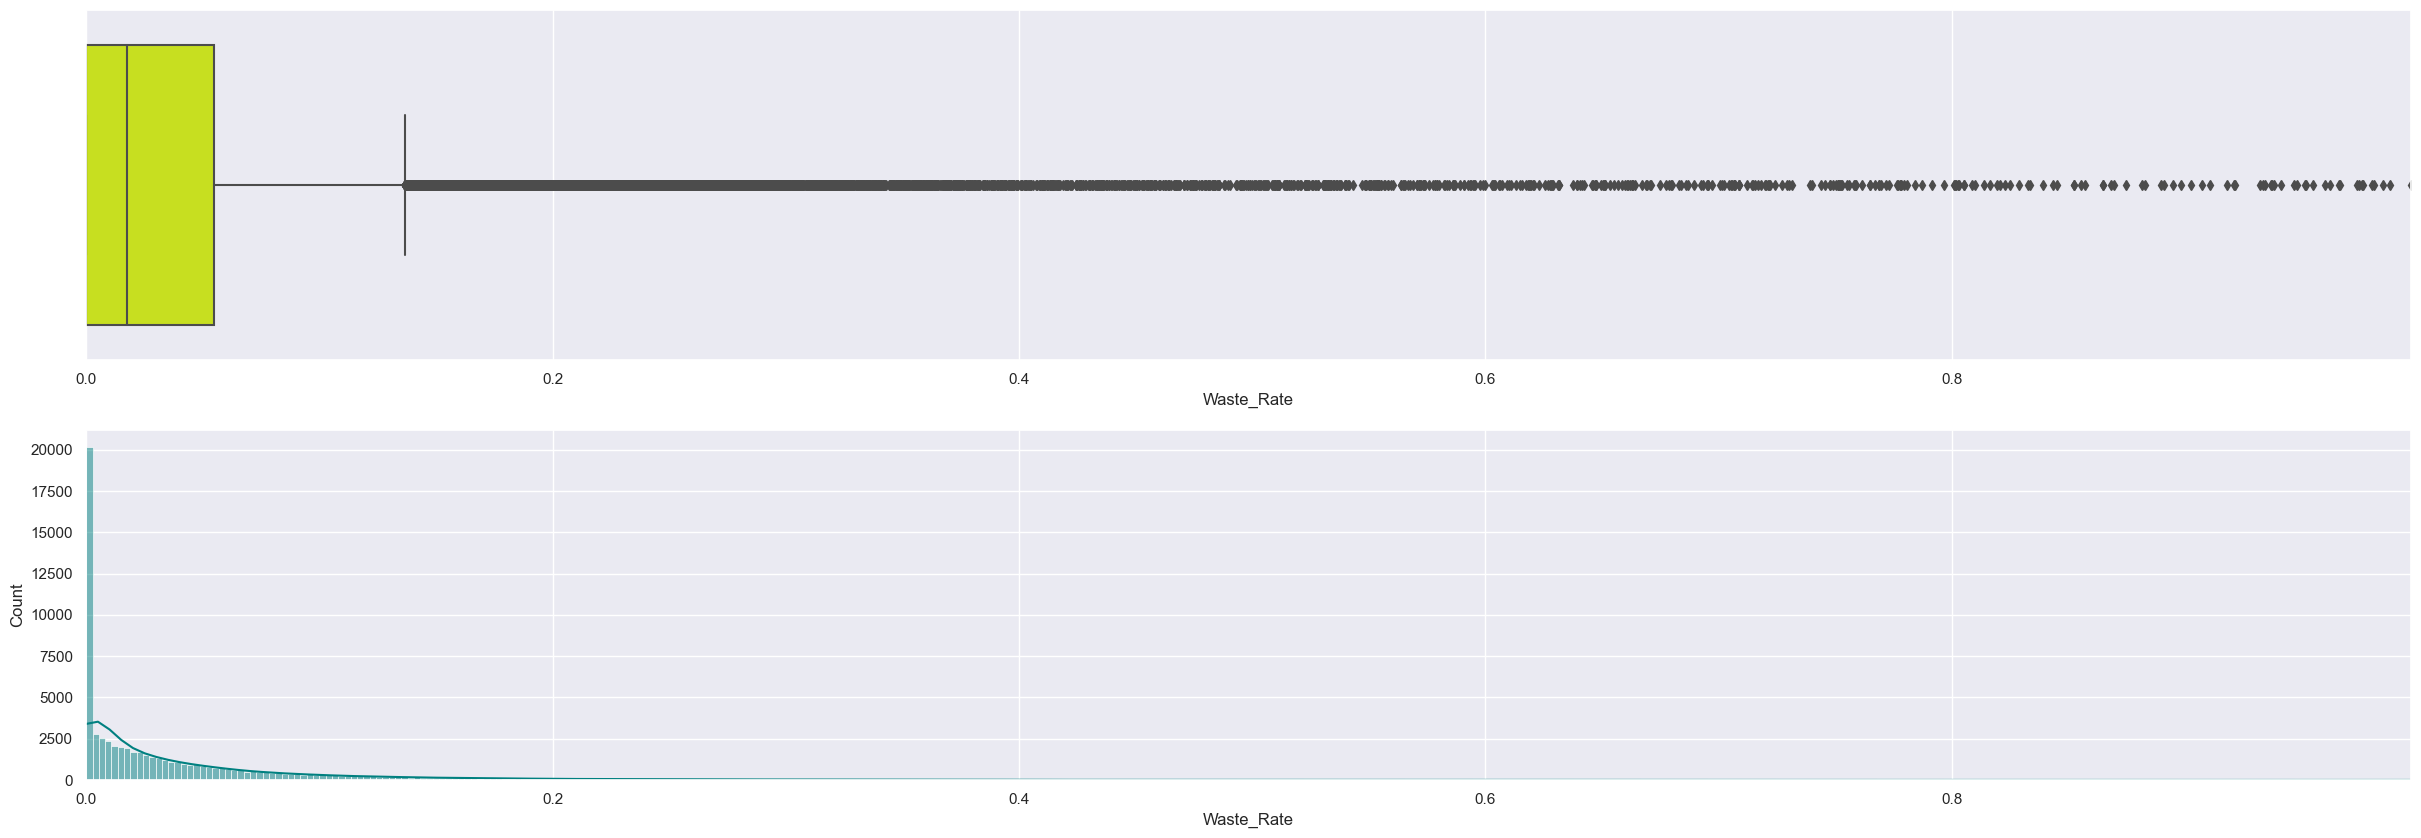

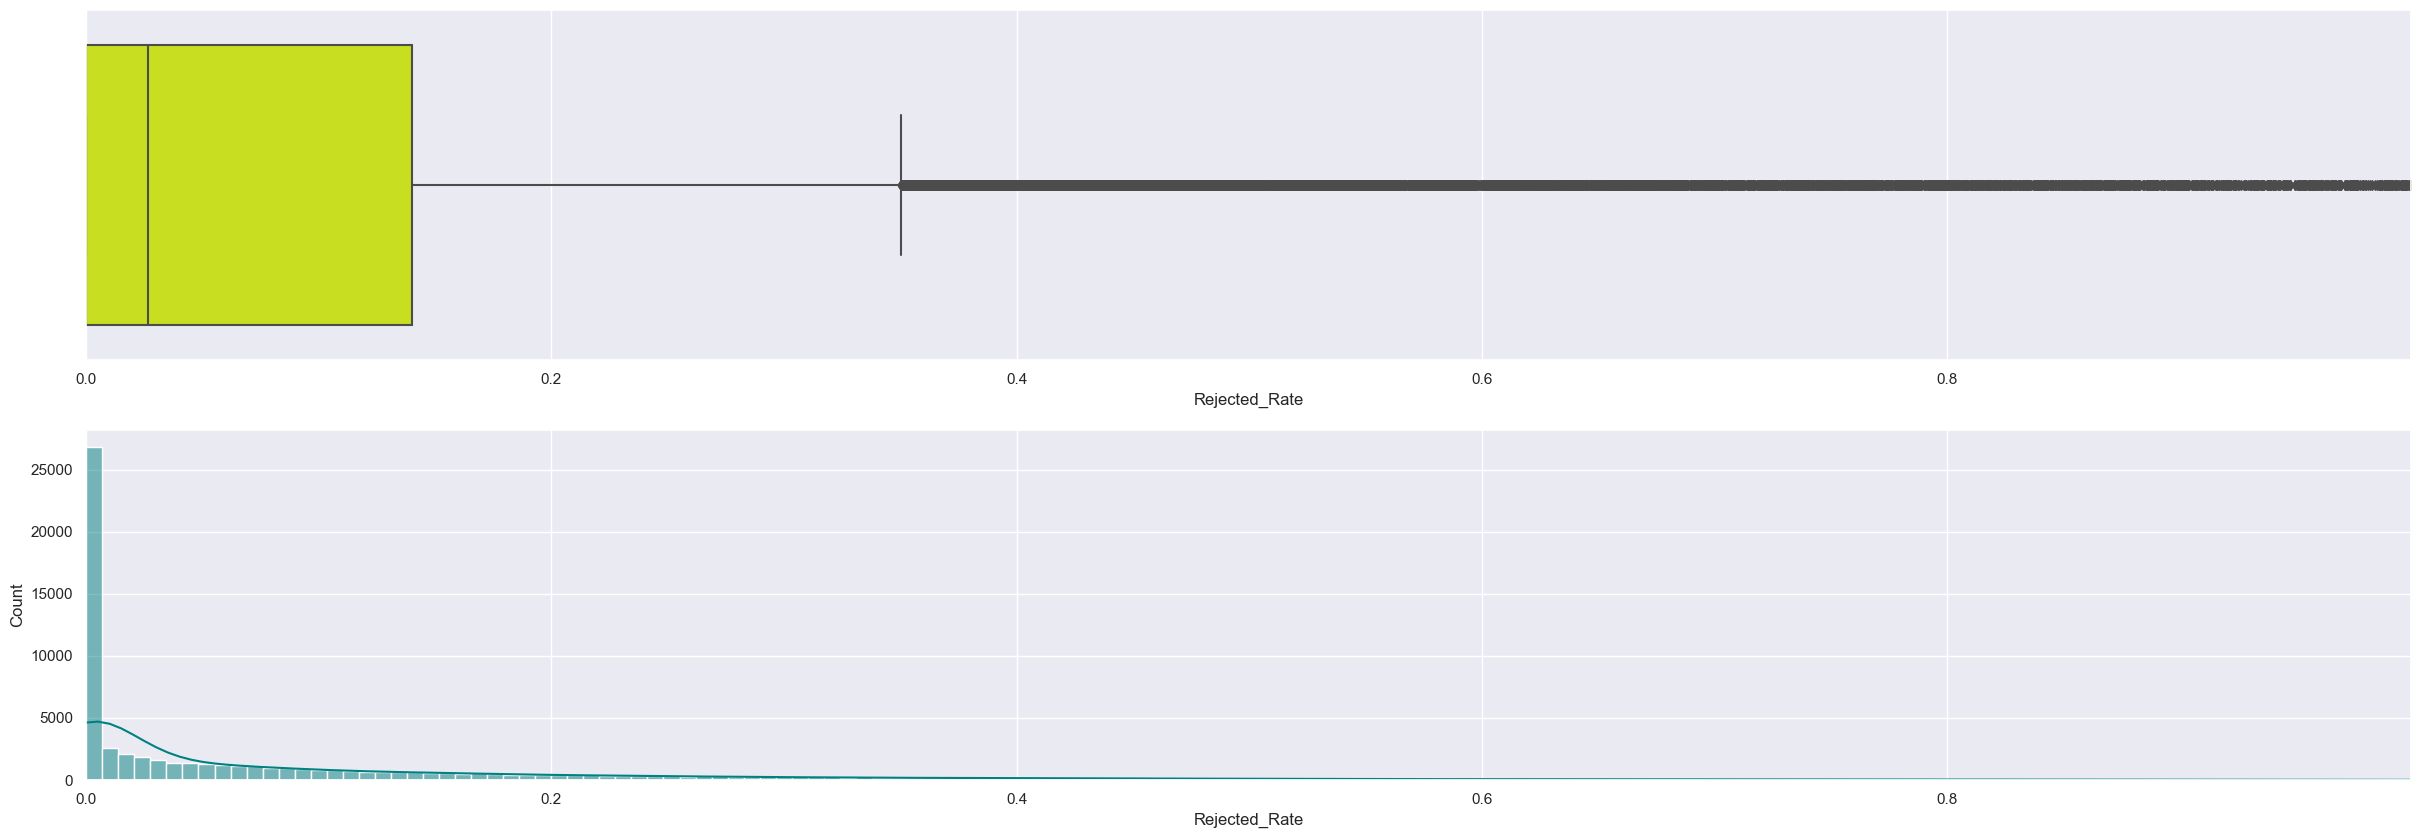

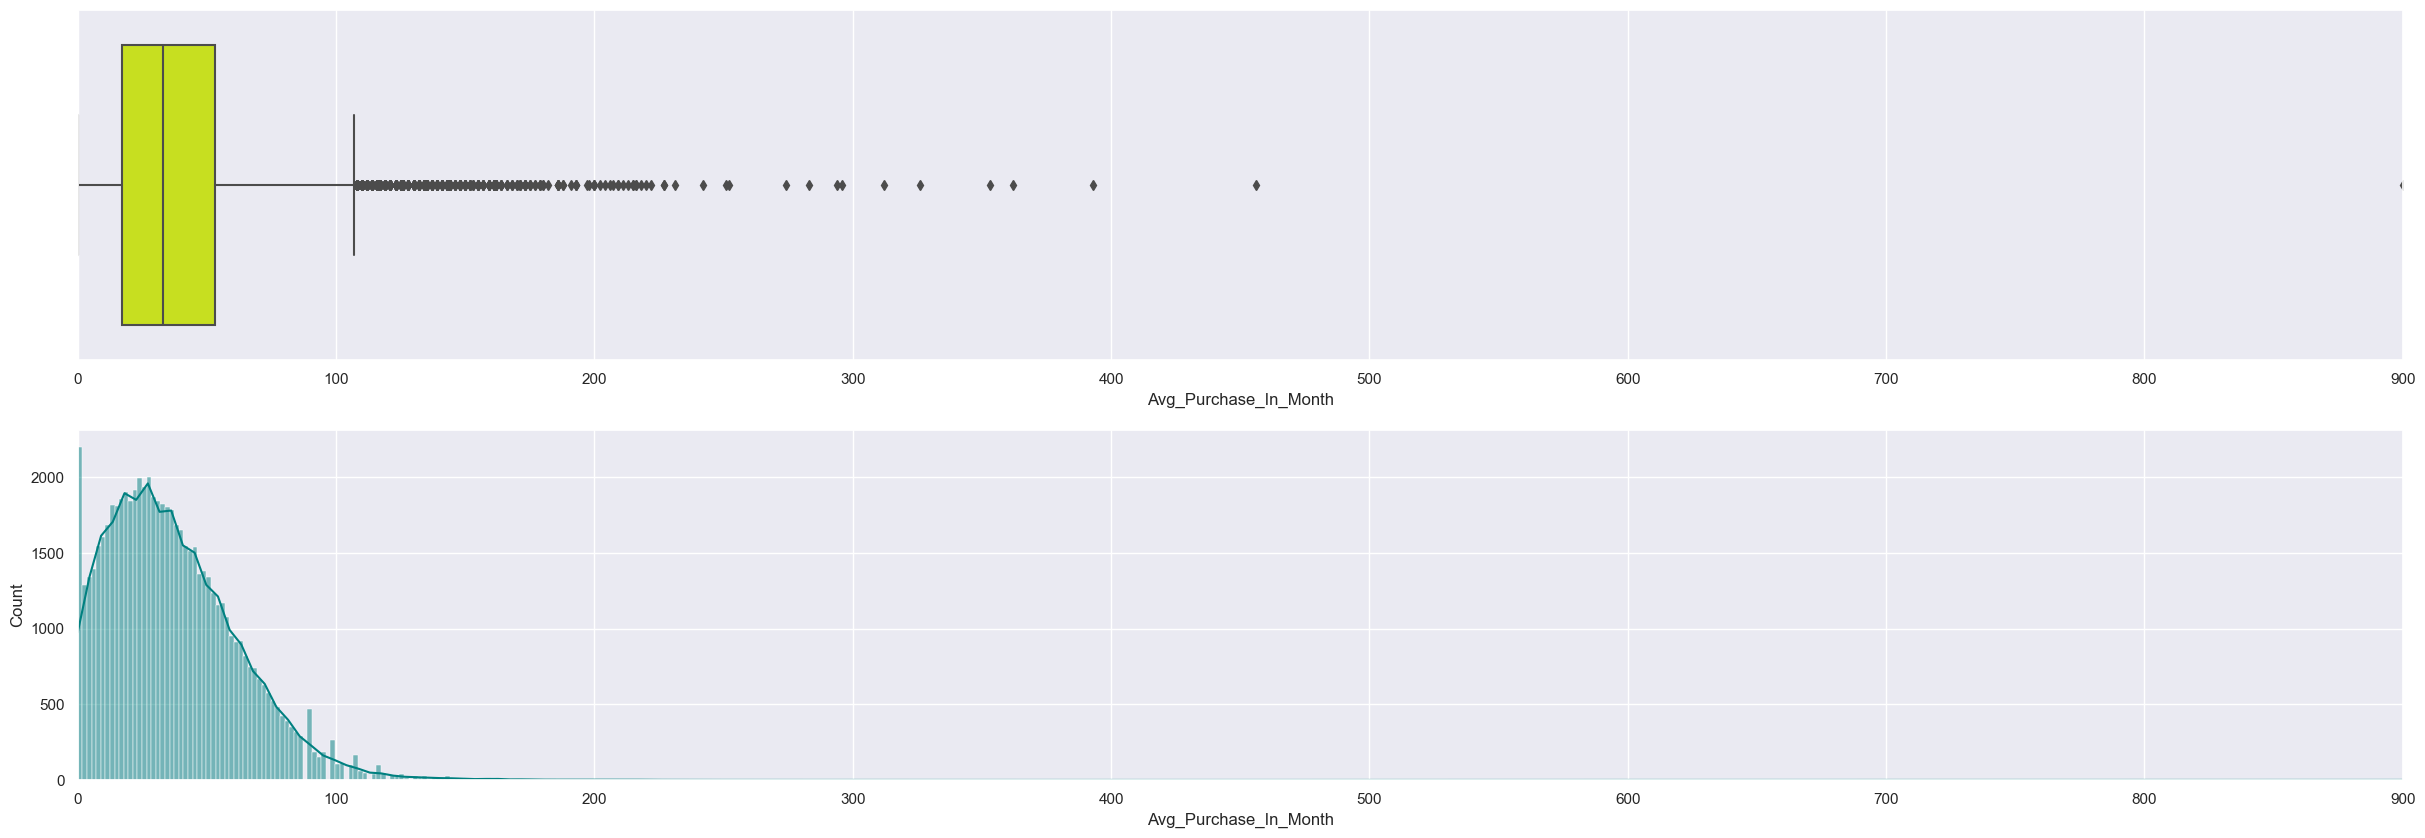

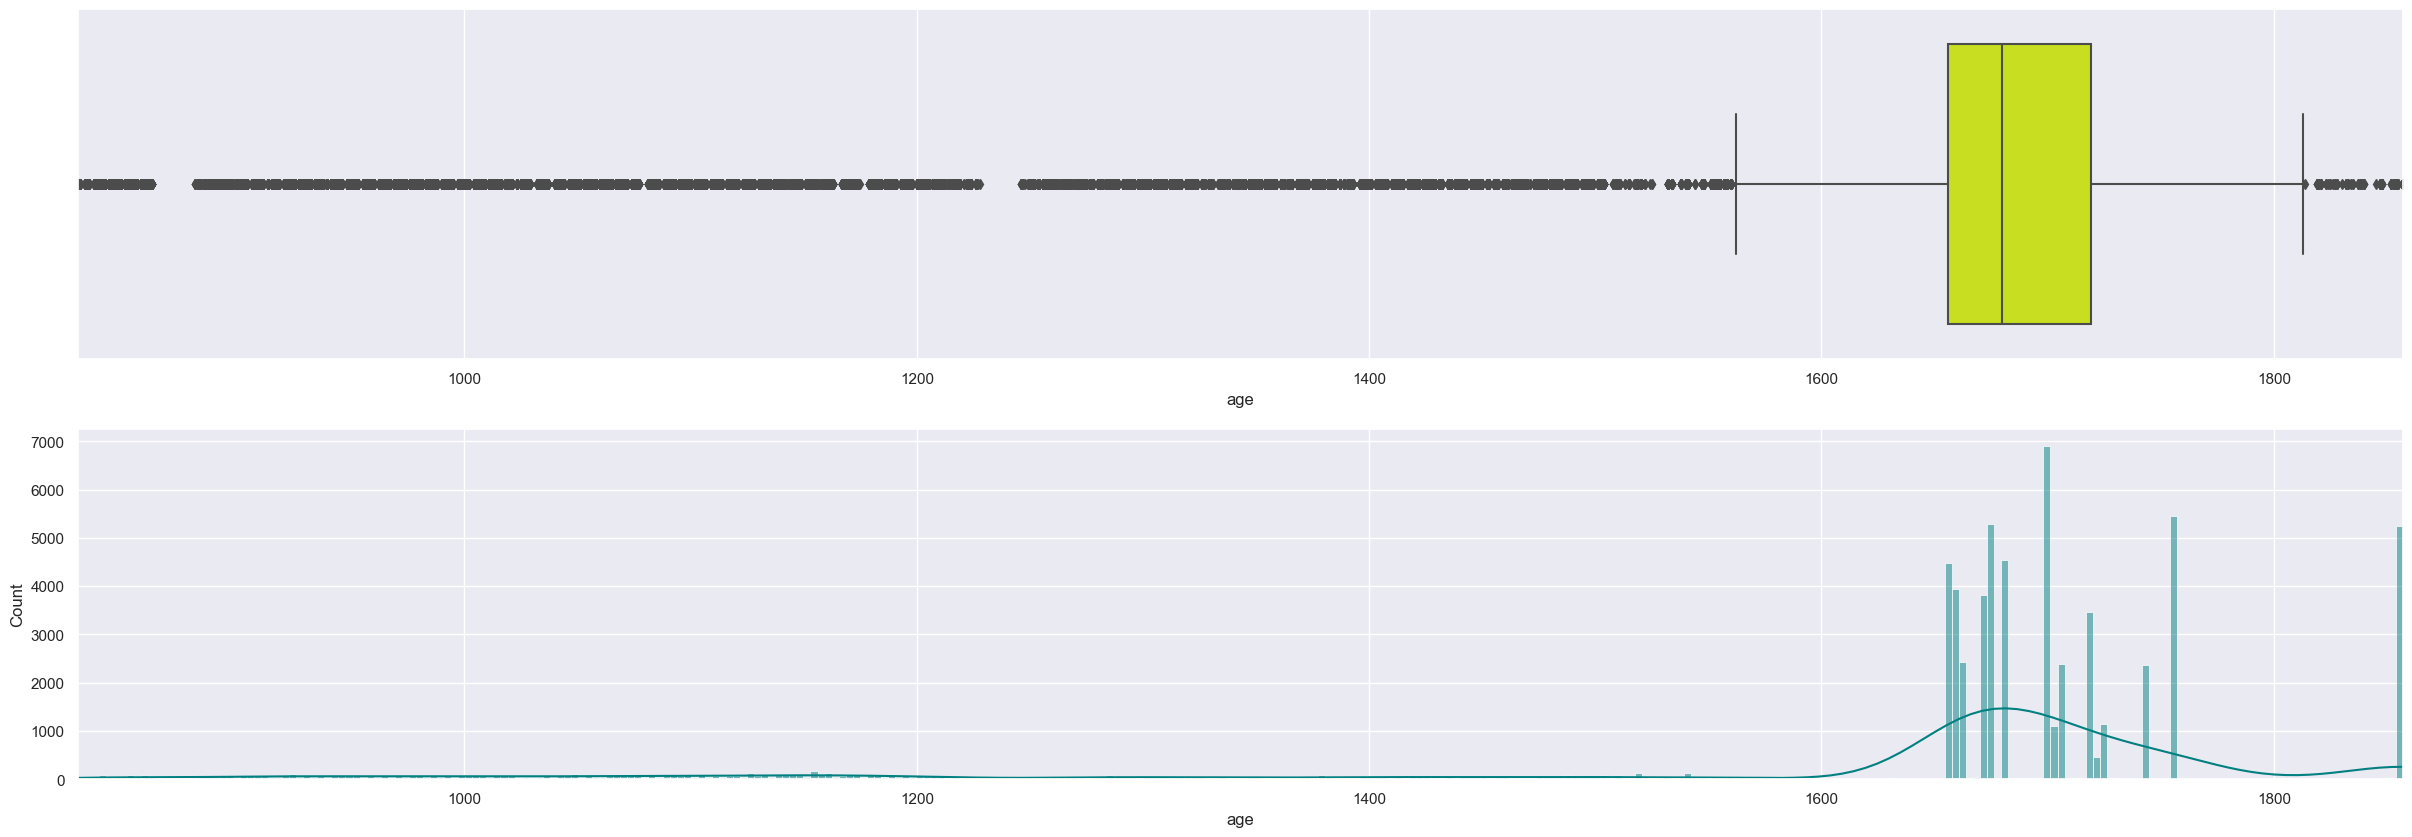

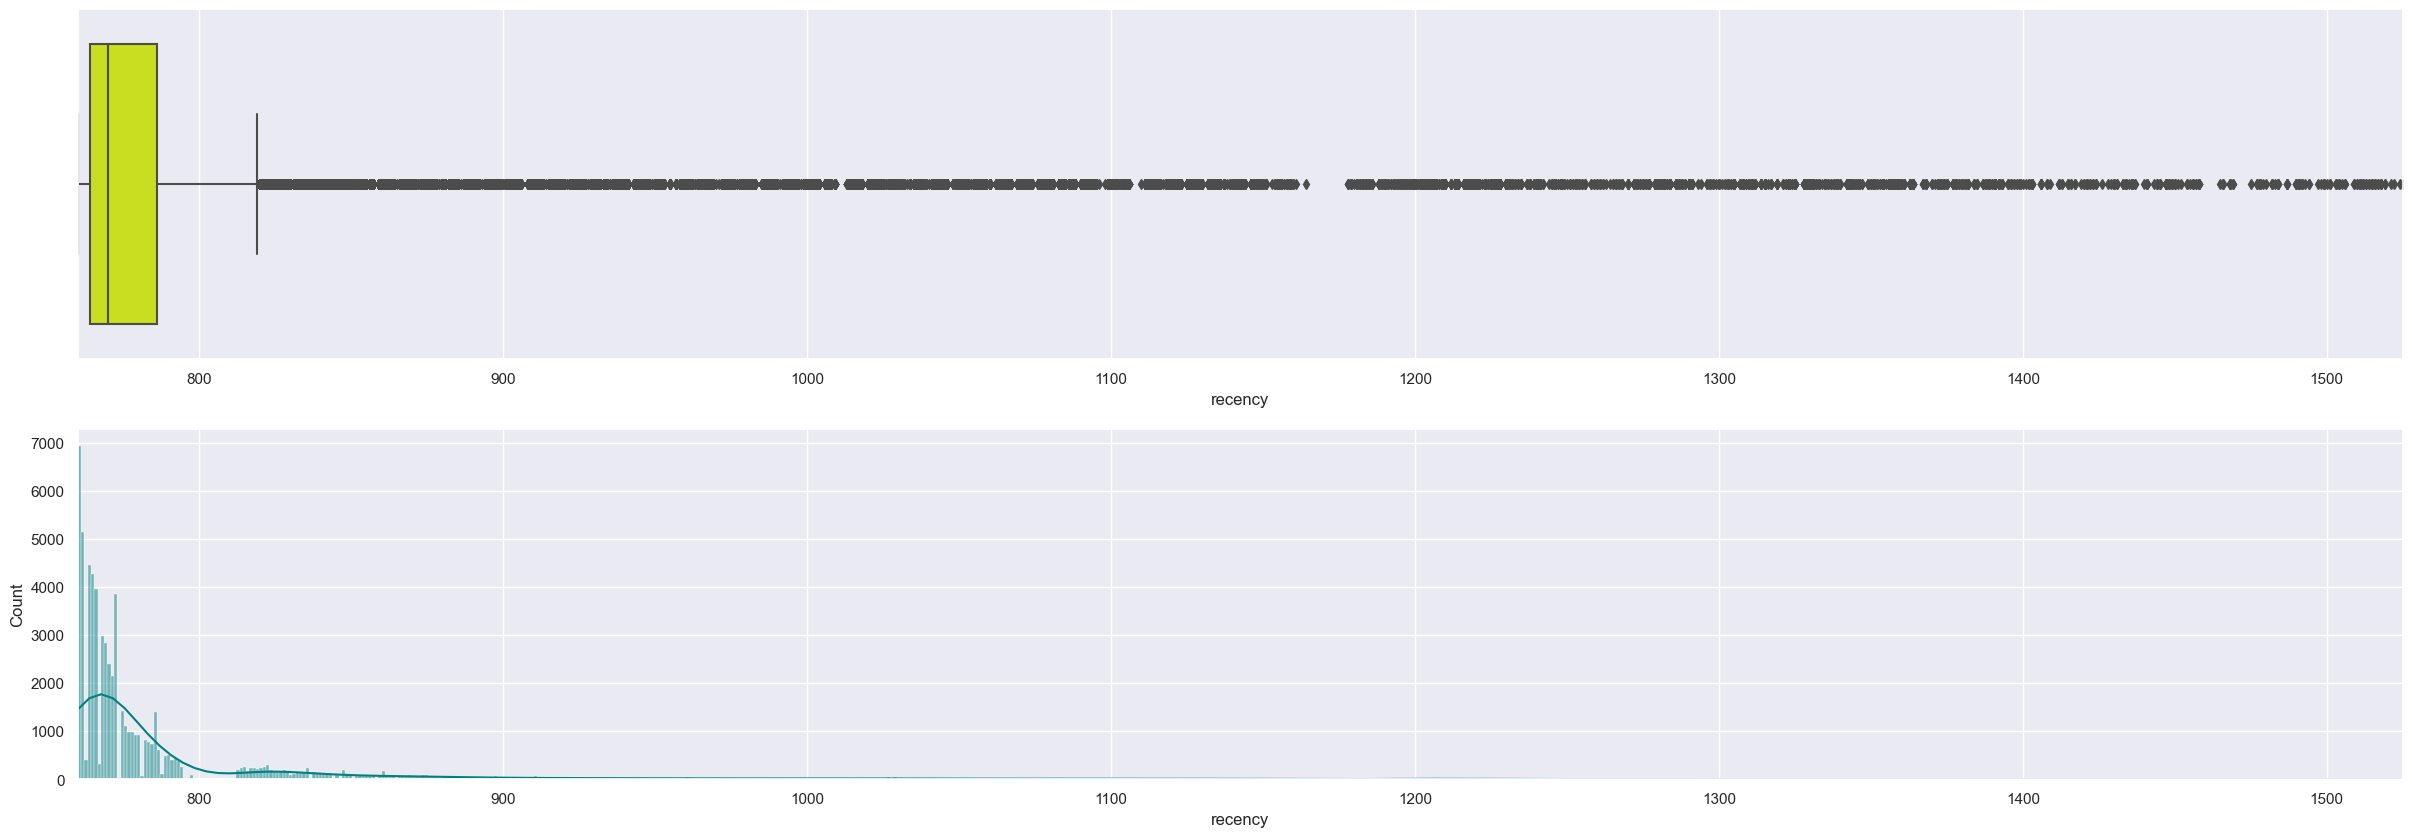

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.rcParams["figure.figsize"] = [30, 10]

# Define color palette
palette = ["#DFFF00", "#008080", "#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]

# Iterate over the specified columns
for i, v in enumerate(["Net_ Purchase(IRR)", "Avg_Invoice_Row_No", "Waste_Rate", "Rejected_Rate",
                       "Avg_Purchase_In_Month", "age", "recency"]):
    # Create subplots
    ax = plt.subplot(2, 1, 1)
    left_lim = data[v].min()
    right_lim = data[v].max()
    ax.set_xlim(left_lim, right_lim)
    sns.boxplot(data=data, x=v, color=palette[0])

    ax = plt.subplot(2, 1, 2)
    ax.set_xlim(left_lim, right_lim)
    sns.histplot(data=data, x=v, kde=True, color=palette[1])

    plt.show()


Identifying skewness in the data, especially through visualizations like box plots, provides valuable insights into the distribution of customer purchasing behavior. Let's elaborate on the implications and considerations stemming from the observation of skewed data:

1. **Understanding Skewed Data:**
Skewness in customer purchase data indicates a significant difference between the majority of customers and a smaller group of high-value customers. This asymmetry can impact the effectiveness of certain clustering algorithms, as they may be more sensitive to outliers in skewed datasets.

2. **Impact on Cluster Analysis:**
In the context of clustering algorithms like K-Means, skewed data with a few high-value customers might lead to clusters dominated by the larger spenders. This can potentially overshadow clusters representing the majority of customers, affecting the interpretability and practicality of the segmentation.

3. **Outlier Handling:**
Given the presence of customers making substantially larger purchases, consideration should be given to outlier handling. DBSCAN, for instance, is less sensitive to outliers, making it a potential candidate for mitigating the impact of high spenders on cluster formation.

4. **Feature Engineering:**
Skewed data may benefit from feature engineering to create normalized or scaled versions of the features. Techniques such as logarithmic transformations or standardization can help balance the influence of extreme values, aiding in the clustering process.

5. **Strategic Segmentation:**
Understanding the presence of high-value customers is crucial for strategic segmentation. It might be beneficial to have specific clusters or marketing strategies tailored to this group, acknowledging their distinct characteristics and preferences.

In [18]:
import numpy as np

def calculate_outliers(column):
    q3, q1 = np.nanpercentile(column, [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

for v in ["Net_ Purchase(IRR)", "Avg_Invoice_Row_No", "Waste_Rate", "Rejected_Rate",
          "Avg_Purchase_In_Month", "age", "recency"]:
    outliers_count = calculate_outliers(data[v]).sum()
    outliers_percentage = outliers_count / len(data) * 100
    print(f"Number of outliers in {v}: {outliers_count}")
    print(f"Percentage of outliers in {v}: {outliers_percentage:.2f}%")
    print(" ")

Number of outliers in Net_ Purchase(IRR): 5079
Percentage of outliers in Net_ Purchase(IRR): 7.68%
 
Number of outliers in Avg_Invoice_Row_No: 3594
Percentage of outliers in Avg_Invoice_Row_No: 5.44%
 
Number of outliers in Waste_Rate: 5369
Percentage of outliers in Waste_Rate: 8.12%
 
Number of outliers in Rejected_Rate: 6223
Percentage of outliers in Rejected_Rate: 9.41%
 
Number of outliers in Avg_Purchase_In_Month: 775
Percentage of outliers in Avg_Purchase_In_Month: 1.17%
 
Number of outliers in age: 17597
Percentage of outliers in age: 26.61%
 
Number of outliers in recency: 11449
Percentage of outliers in recency: 17.31%
 


### Understanding Outliers in Customer Data

1. **Net Purchase (IRR) Outliers**
5079 data points are considered outliers in terms of net purchase amount.
These customers exhibit significantly higher or lower purchase behavior compared to the majority.
Investigate whether these outliers represent high-value customers or anomalies.

2. **Avg Invoice Row Number Outliers**
3594 data points have an unusual average invoice row number.
These outliers may indicate specific purchasing patterns or irregularities.
Consider examining the context of these invoices (e.g., large orders, frequent small orders).

3. **Waste Rate and Rejected Rate Outliers**
5369 data points have extreme waste rates, and 6223 have high rejected rates.
These outliers could represent problematic orders or quality control issues.
Investigate the reasons behind these rates and take corrective actions if necessary.

4. **Avg Purchase in Month Outliers**
775 data points show unusual average monthly purchase amounts.
These outliers may correspond to seasonal trends or specific customer behaviors.
Analyze the context (e.g., time of year, customer segments) to understand these variations.

5. **Age and Recency Outliers**
17597 data points have extreme age values, and 11449 have unusual recency.
Age outliers could be due to data entry errors or specific customer profiles.
Recency outliers may indicate infrequent or irregular interactions with your business.

In [19]:
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[data.columns].skew()
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

Skew
Net_ Purchase(IRR)    20.29
Avg_Invoice_Row_No     6.14
Waste_Rate             4.34
recency                4.05
Rejected_Rate          2.35
Avg_Purchase_In_Month  1.77
age                   -1.85

### Analysing the Skewness:

1. **Net Purchase (IRR):**
Skewness: 20.29
Interpretation: The distribution is highly right-skewed, indicating a few customers with significantly larger purchases.

2. **Avg Invoice Row Number:**
Skewness: 6.14
Interpretation: The distribution is moderately right-skewed. Some customers have more invoice rows than others.

3. **Waste Rate:**
Skewness: 4.34
Interpretation: The distribution is right-skewed. Some customers exhibit higher waste rates.

4. **Recency:**
Skewness: 4.05
Interpretation: The distribution is right-skewed. Some customers have more recent interactions than others.

5. **Rejected Rate:**
Skewness: 2.35
Interpretation: The distribution is moderately right-skewed. Some customers have higher rejected rates.

6. **Avg Purchase in Month:**
Skewness: 1.77
Interpretation: The distribution is slightly right-skewed. Some customers make larger monthly purchases.

7. **Age:**
Skewness: -1.85
Interpretation: The distribution is slightly left-skewed. Some customers are younger than the majority.

### Recommendations:

1. Consider applying appropriate transformations (e.g., log, square root) to reduce skewness.
2. Investigate the context of extreme values (outliers) in each feature.
3. Use transformed features for clustering to improve the effectiveness of K-Means.

In [20]:
# Perform the skew transformation:
new_data=data
for col in skew_cols.index.values:
    new_data[col] = new_data[col].apply(np.log1p)
new_data[data.columns].skew().sort_values(ascending=False)

recency                  3.52
Waste_Rate               3.46
Rejected_Rate            1.95
Avg_Invoice_Row_No      -1.23
Avg_Purchase_In_Month   -1.48
age                     -2.11
Net_ Purchase(IRR)      -4.33
dtype: float64

### After applying the log transformation to the specified features:

1. **Recency:**
Skewness: 3.52 (right-skewed)
After the log transformation, the skewness has decreased, but it is still right-skewed.
Some customers still exhibit more recent interactions than others.

2. **Waste Rate:**
Skewness: 3.46 (right-skewed)
The log transformation has reduced the skewness, but it remains right-skewed.
Some customers still have higher waste rates.

3. **Rejected Rate:**
Skewness: 1.95 (right-skewed)
The log transformation has improved the skewness, but it is still moderately right-skewed.
Some customers still exhibit higher rejected rates.

4. **Avg Invoice Row Number:**
Skewness: -1.23 (left-skewed)
The log transformation has shifted the distribution towards the left.
Some customers have fewer average invoice rows.

5. **Avg Purchase in Month:**
Skewness: -1.48 (left-skewed)
The log transformation has reduced the skewness, making the distribution less left-skewed.
Some customers still make smaller monthly purchases.

6. **Age:**
Skewness: -2.11 (left-skewed)
The log transformation has improved the skewness, making the distribution less left-skewed.
Some customers are still younger than the majority.

7. **Net Purchase (IRR):**
Skewness: -4.33 (left-skewed)
The log transformation has significantly reduced the skewness.
The distribution is now less left-skewed, indicating a better balance.

### Recommendations:

1. Continue monitoring the transformed features during clustering.
2. Consider using these transformed features for K-Means Clustering to improve the effectiveness of the algorithm.

In [21]:
for i,v in enumerate(["Net_ Purchase(IRR)","Avg_Invoice_Row_No","Waste_Rate","Rejected_Rate",
                      "Avg_Purchase_In_Month","age","recency"]):
    q3, q1 = np.nanpercentile(new_data[v], [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    OutliersNo=len(new_data[(new_data[v] < lower_bound) | (new_data[v] > upper_bound)])
    print("Number Of outliers in ",v,"is",OutliersNo)
    print("Percentage of outliers %s is %.2f" %(str(v),OutliersNo/len(new_data)))
    print(" ")

Number Of outliers in  Net_ Purchase(IRR) is 3128
Percentage of outliers Net_ Purchase(IRR) is 0.05
 
Number Of outliers in  Avg_Invoice_Row_No is 3547
Percentage of outliers Avg_Invoice_Row_No is 0.05
 
Number Of outliers in  Waste_Rate is 5059
Percentage of outliers Waste_Rate is 0.08
 
Number Of outliers in  Rejected_Rate is 5326
Percentage of outliers Rejected_Rate is 0.08
 
Number Of outliers in  Avg_Purchase_In_Month is 3505
Percentage of outliers Avg_Purchase_In_Month is 0.05
 
Number Of outliers in  age is 17624
Percentage of outliers age is 0.27
 
Number Of outliers in  recency is 11210
Percentage of outliers recency is 0.17
 


1. **Net Purchase (IRR):**
3128 data points are considered outliers in terms of net purchase amount.
These outliers represent extreme purchase behavior, either significantly higher or lower than the majority.

2. **Avg Invoice Row Number:**
3547 data points have an unusual average invoice row number.
These outliers may correspond to specific invoice patterns or irregularities.

3. **Waste Rate:**
5059 data points exhibit extreme waste rates.
Investigate the reasons behind these high waste rates.

4. **Rejected Rate:**
5326 data points have unusually high rejected rates.
Analyze the context of these rejections (e.g., product quality, supplier issues).

5. **Avg Purchase in Month:**
3505 data points show unusual average monthly purchase amounts.
These outliers may correspond to specific time periods or customer behaviors.

6. **Age:**
17624 data points have extreme age values.
Investigate whether these outliers represent specific age groups or data entry errors.

7. **Recency:**
11210 data points exhibit unusual recency (time since last interaction).
Analyze the context of these recency outliers (e.g., seasonal trends, customer segments).

### Implications

1. Investigate the context of each outlier category.
2. Consider segmenting customers based on their behavior (e.g., high-value customers, infrequent buyers).
3. Use outlier information to tailor marketing strategies or improve customer service.

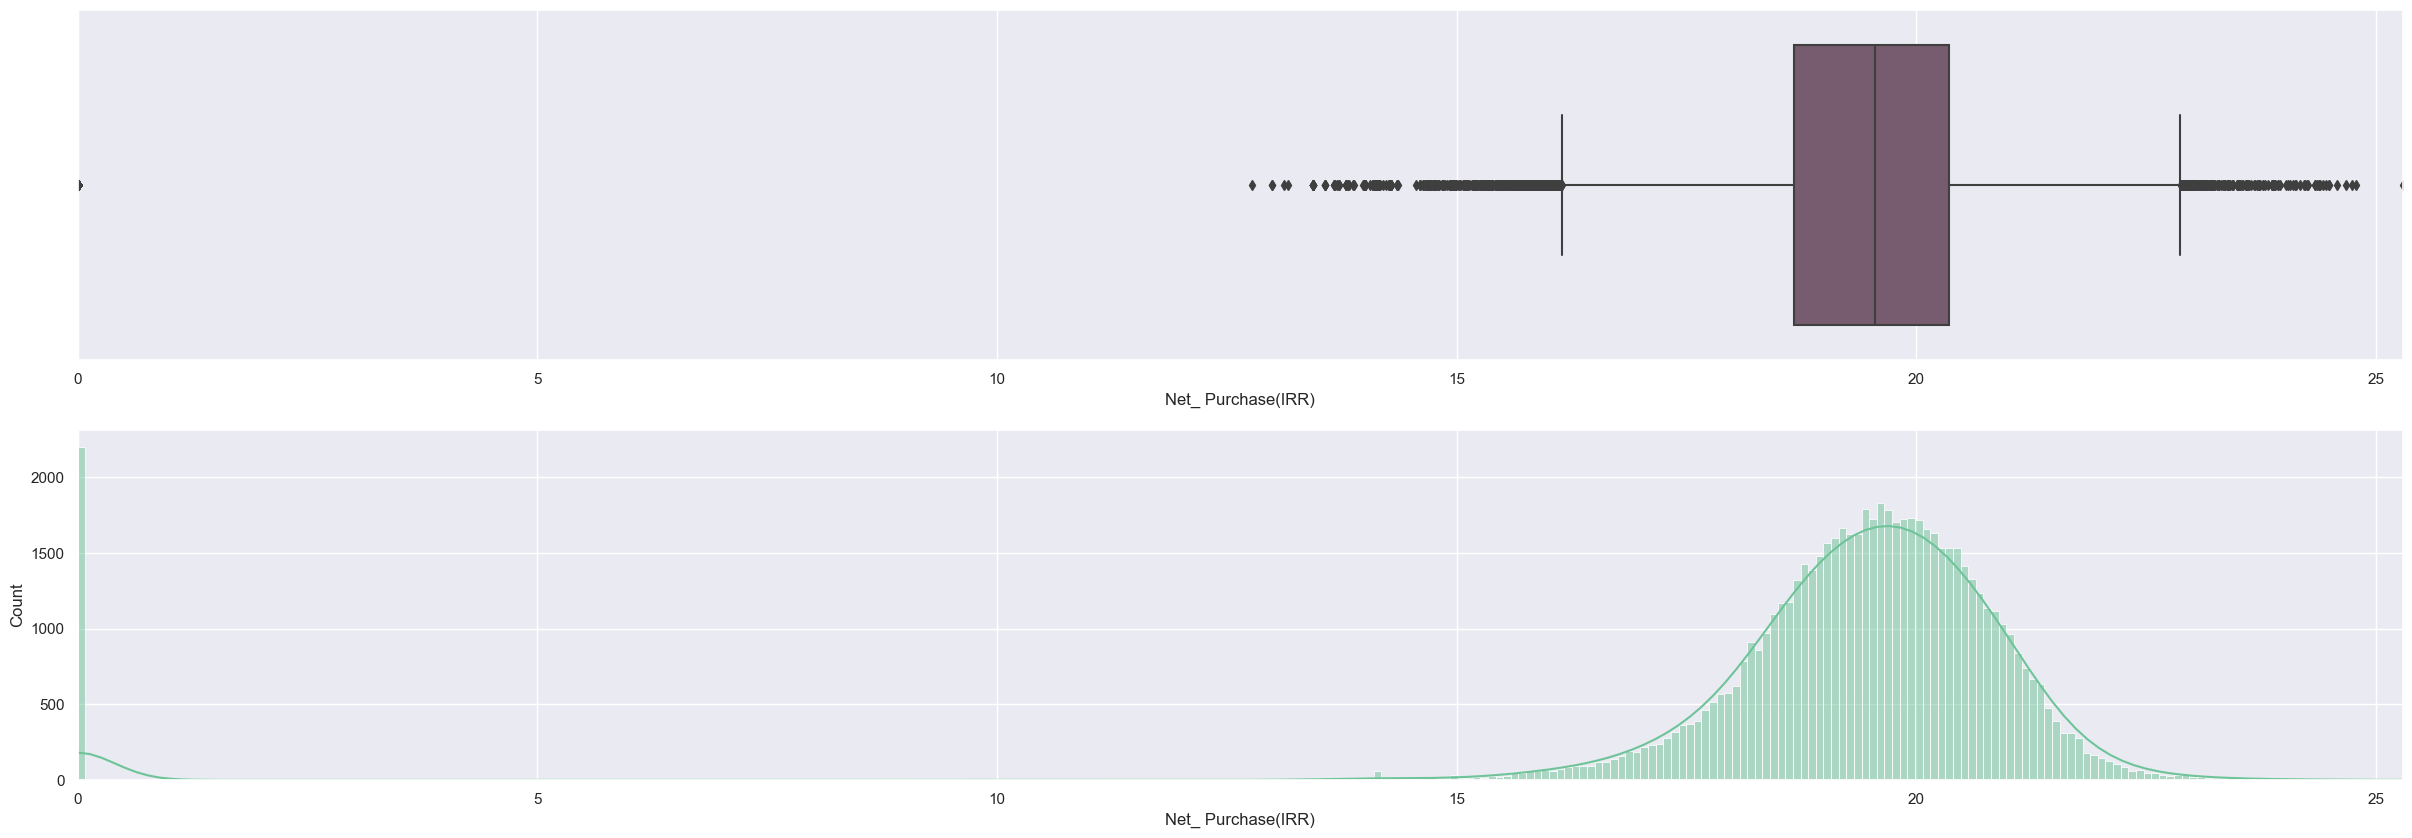

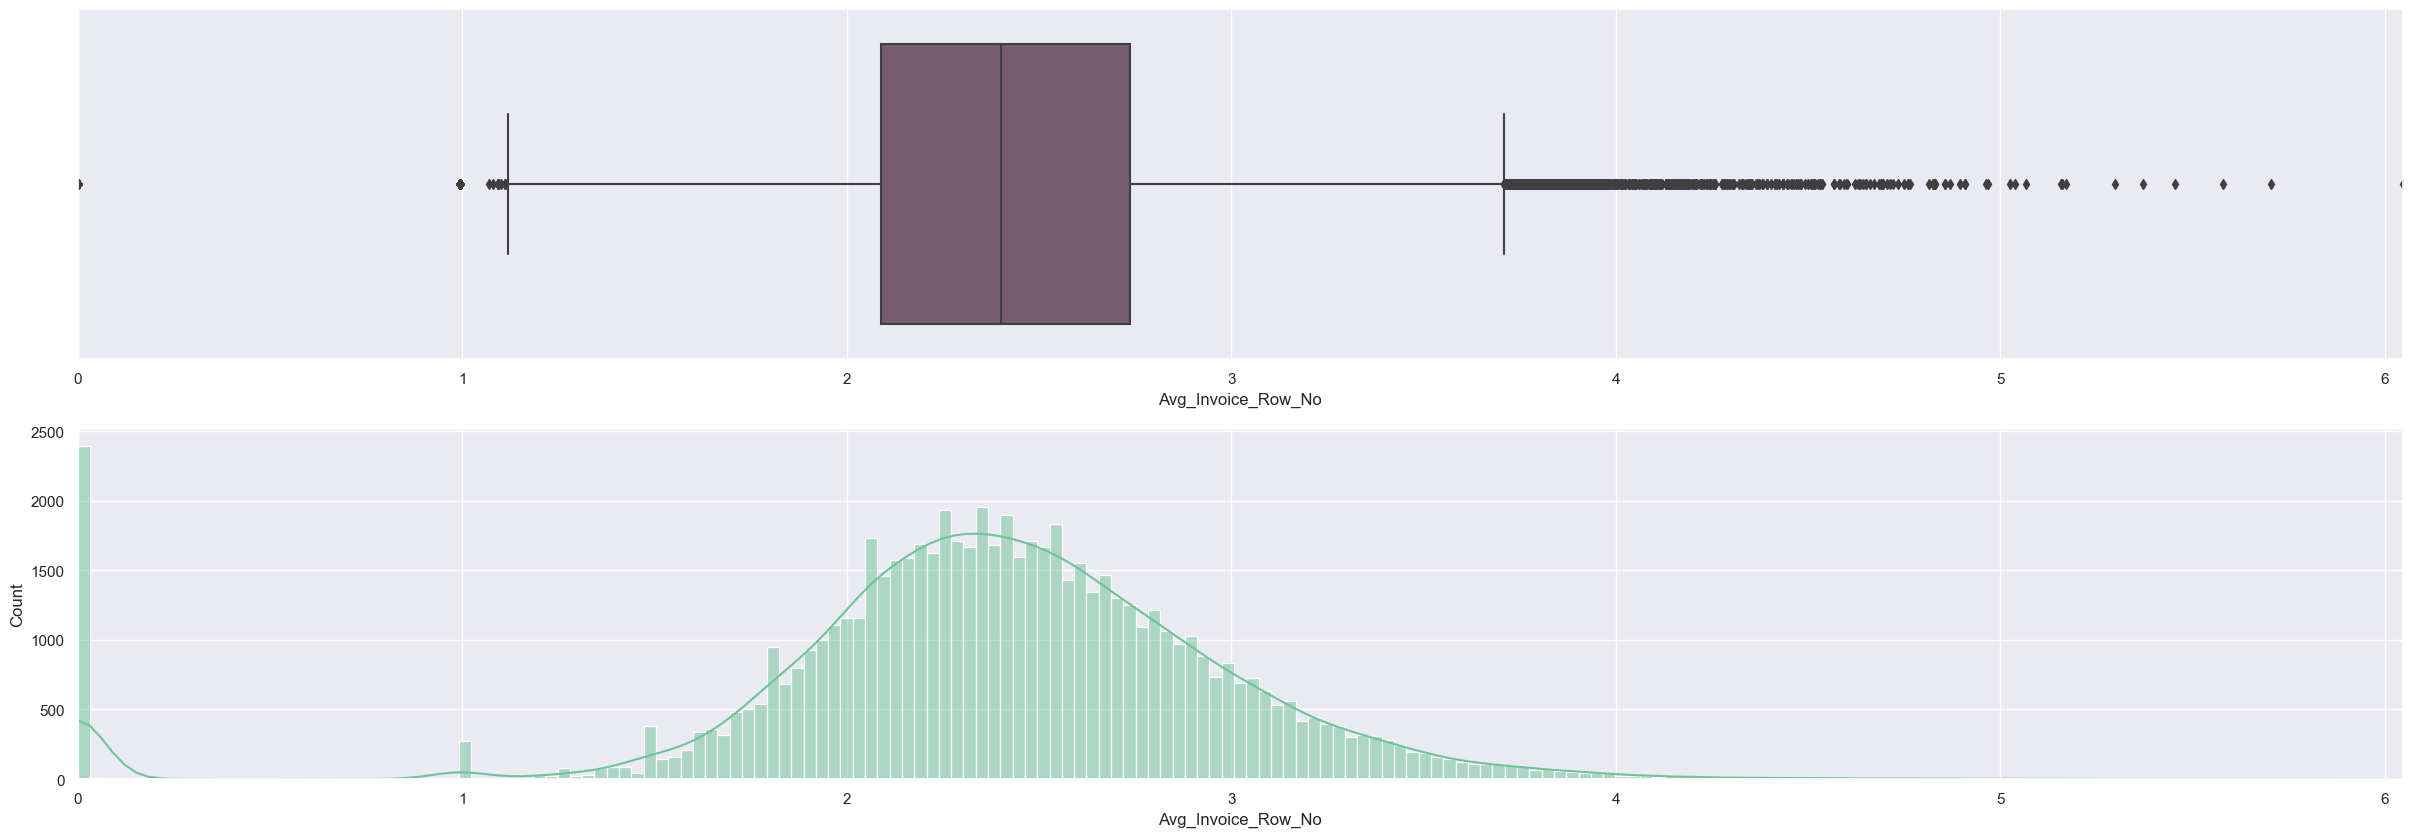

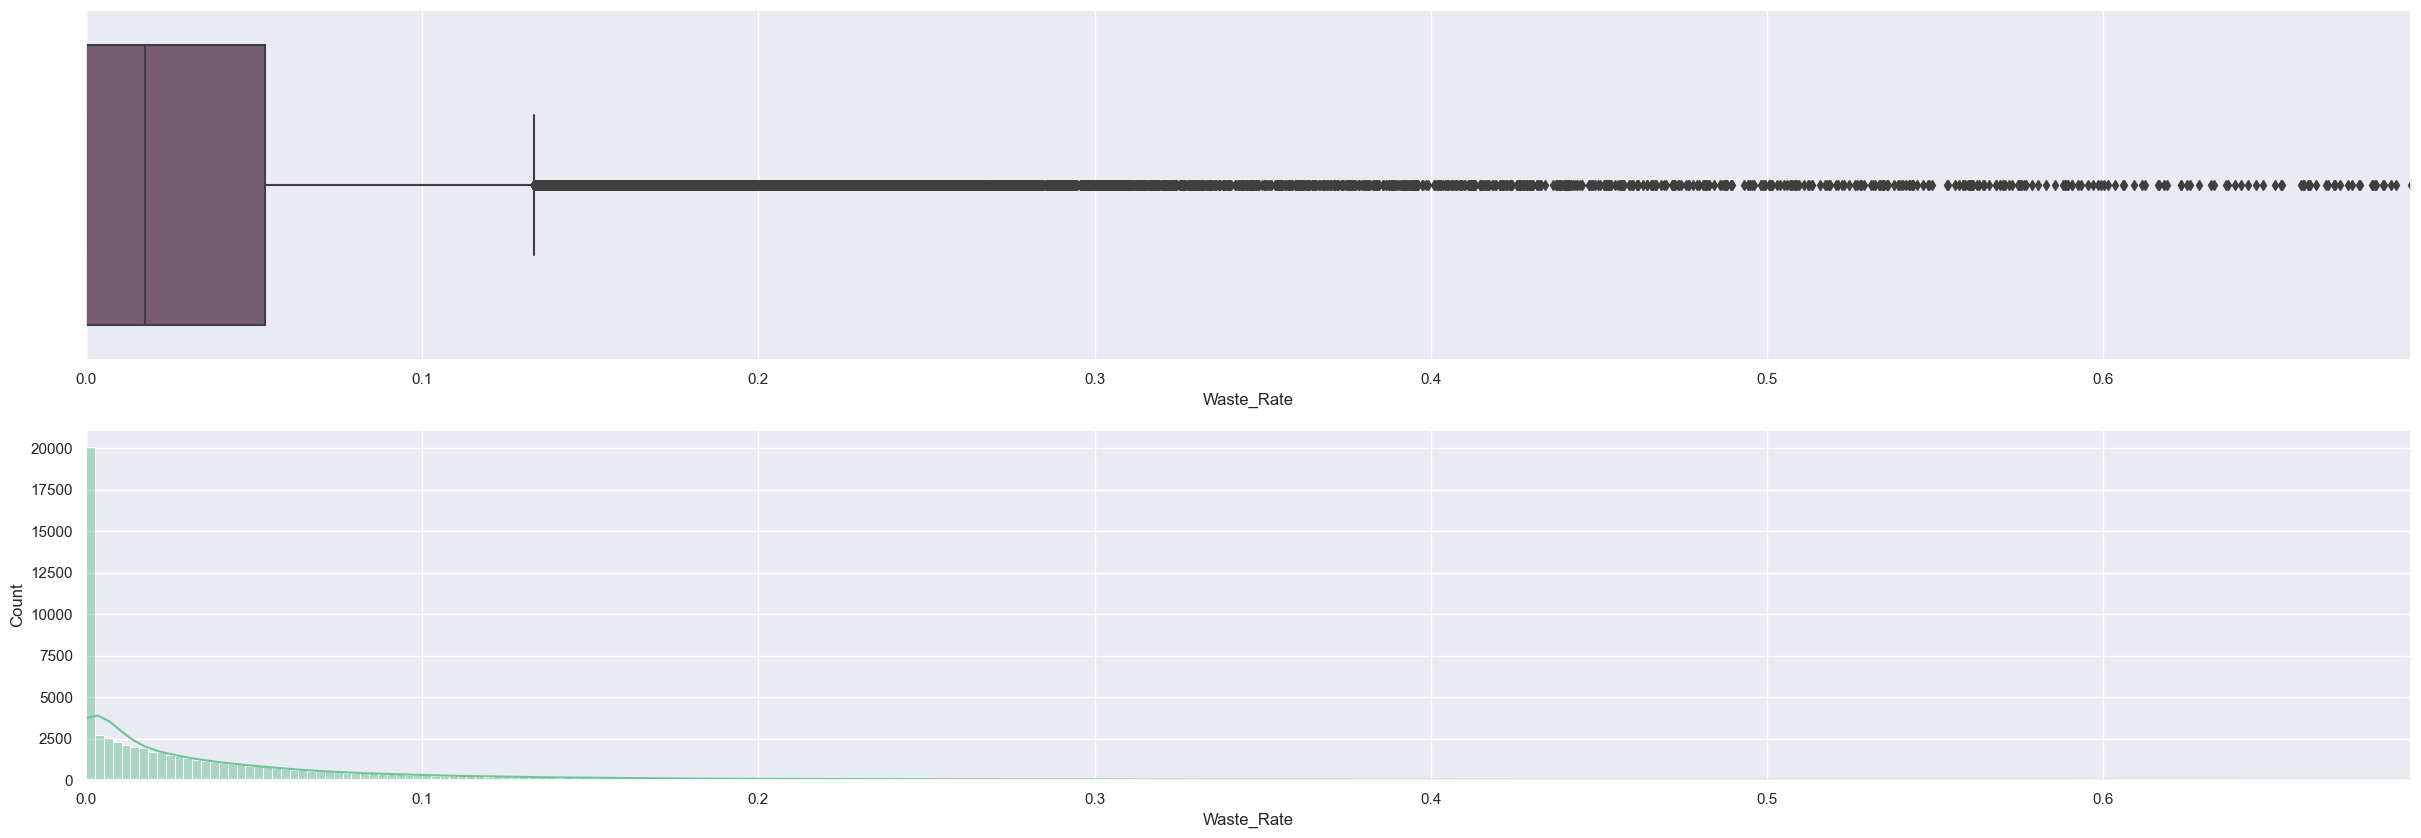

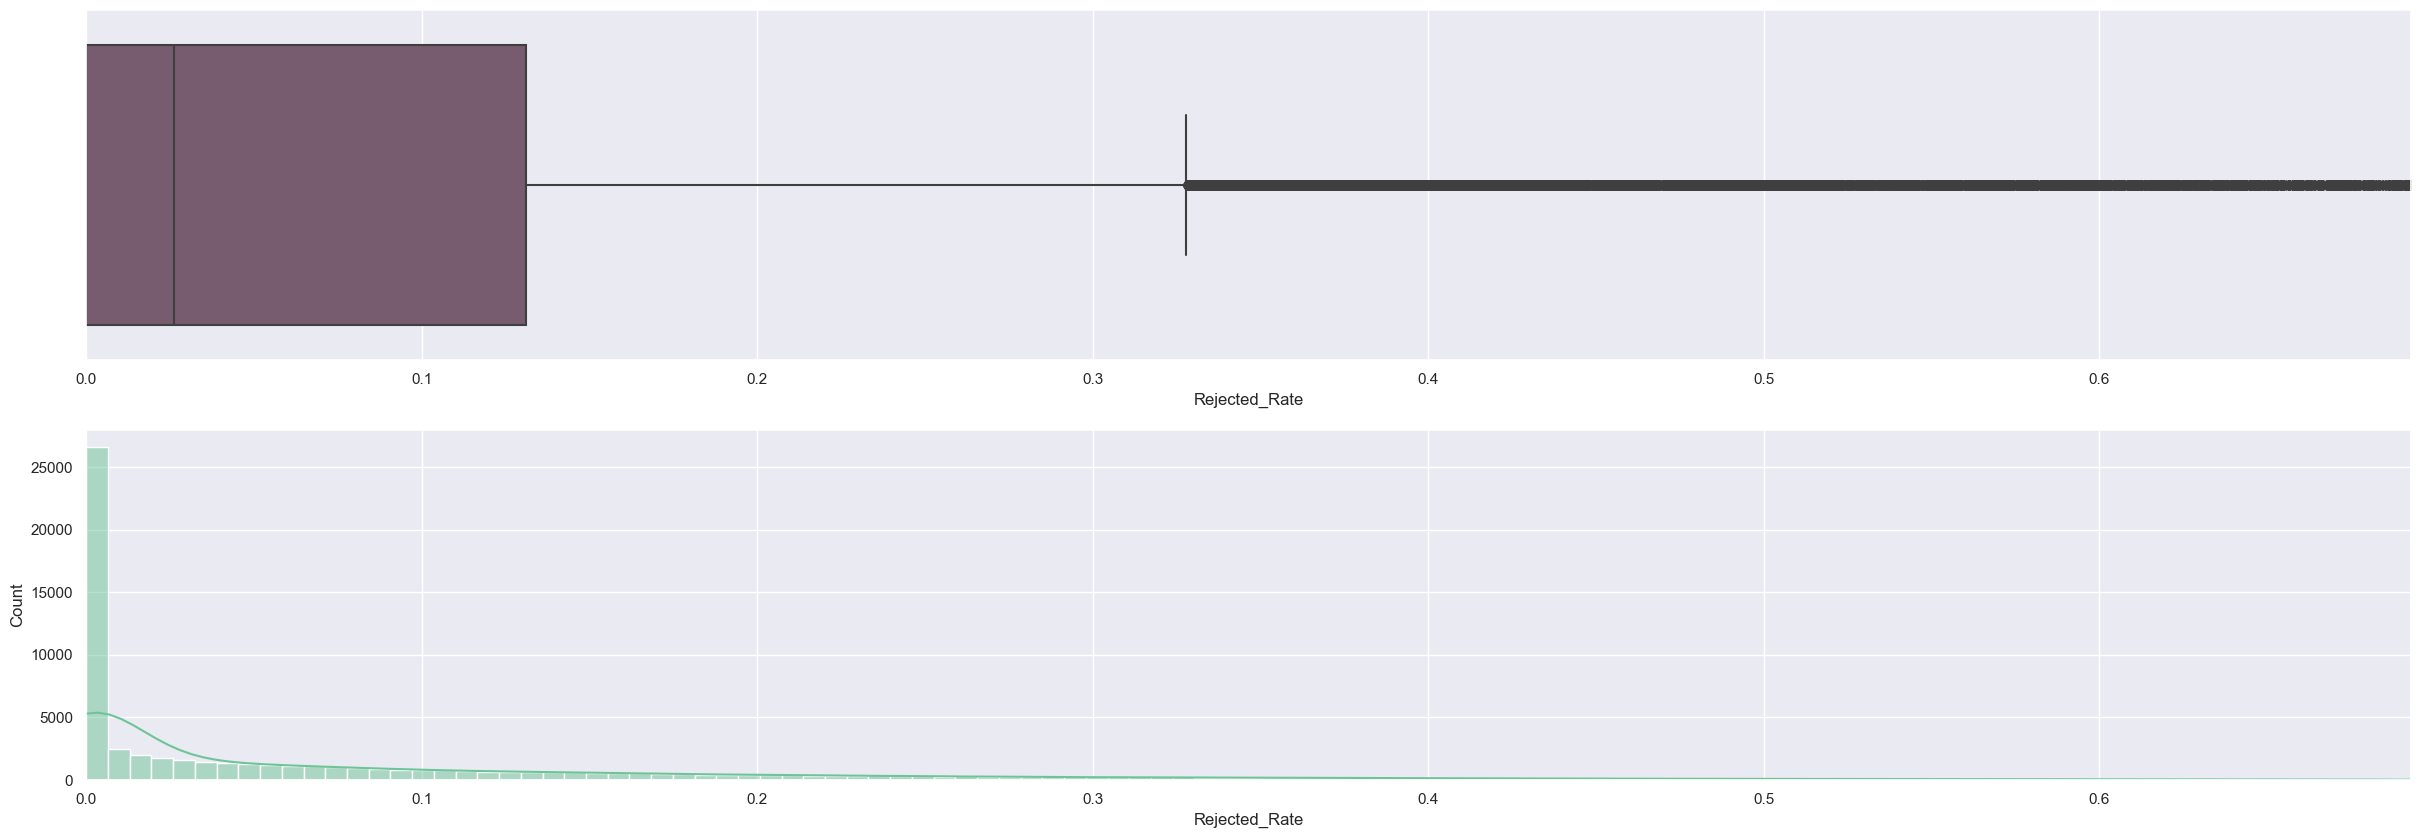

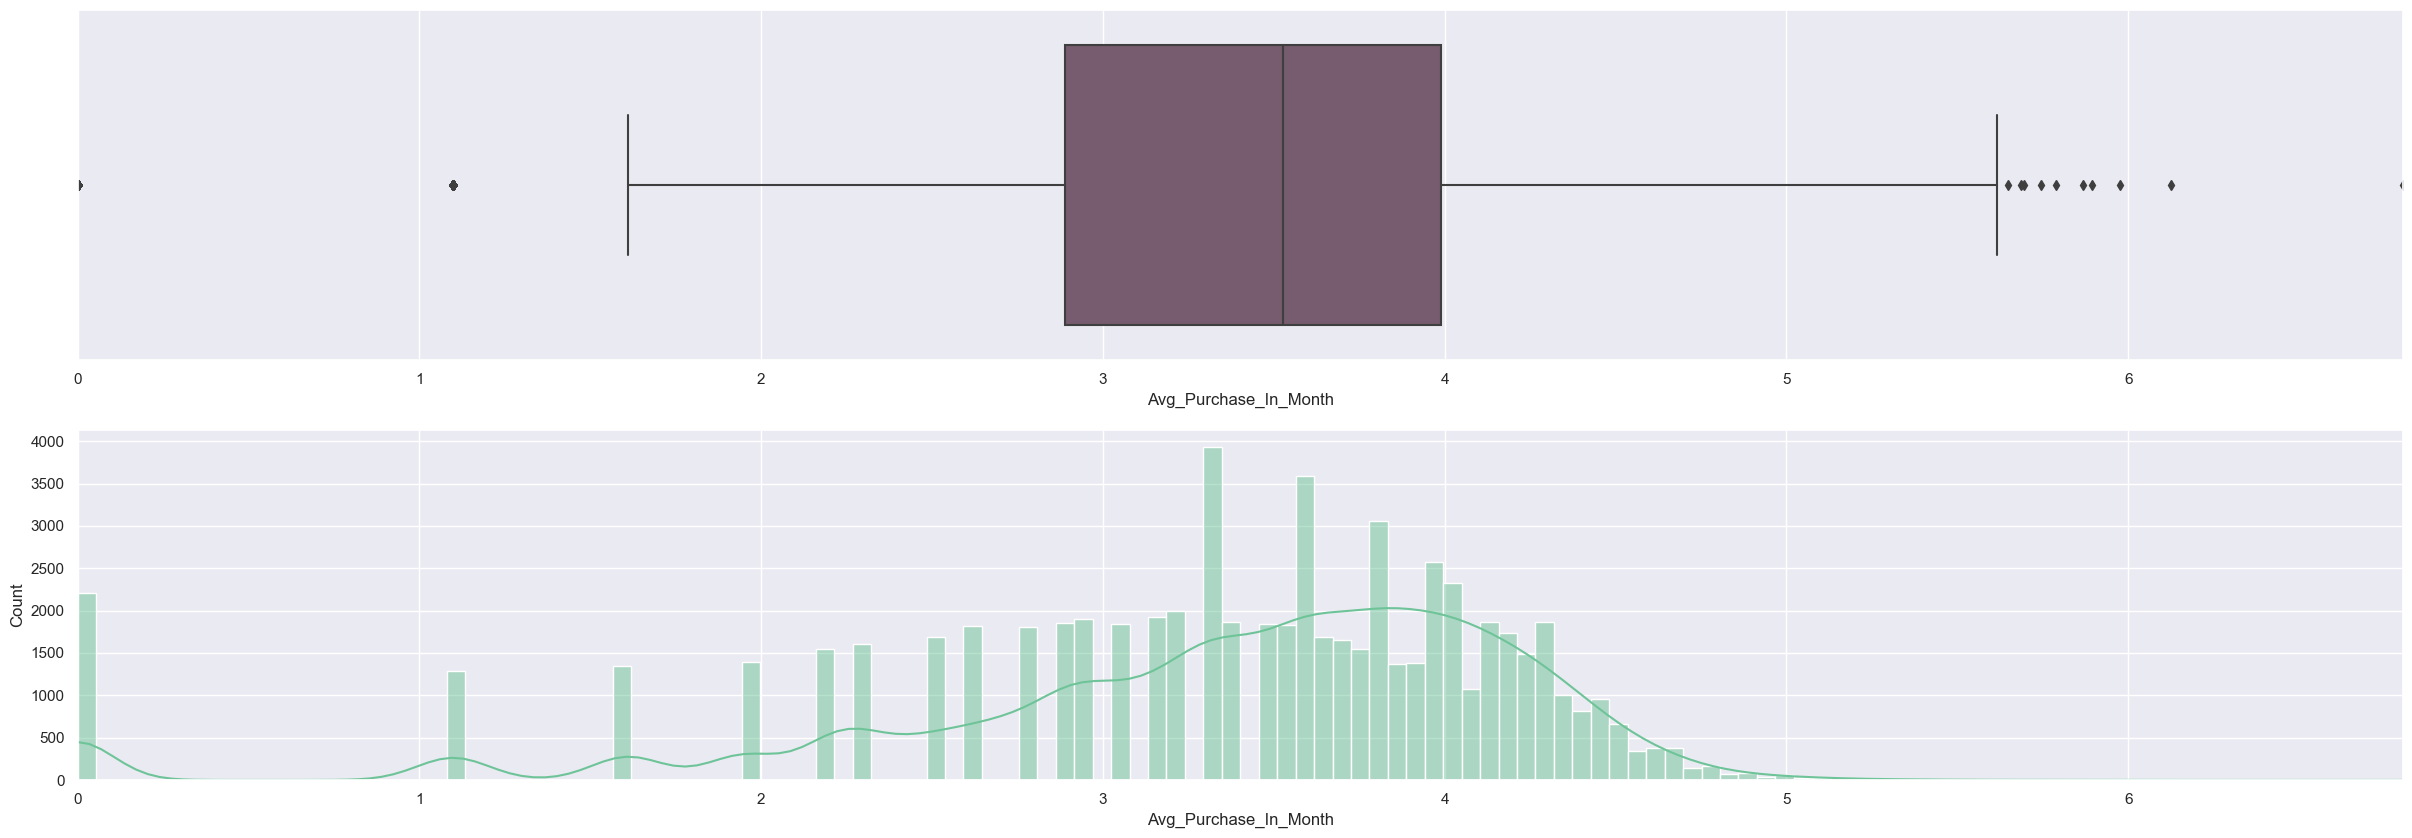

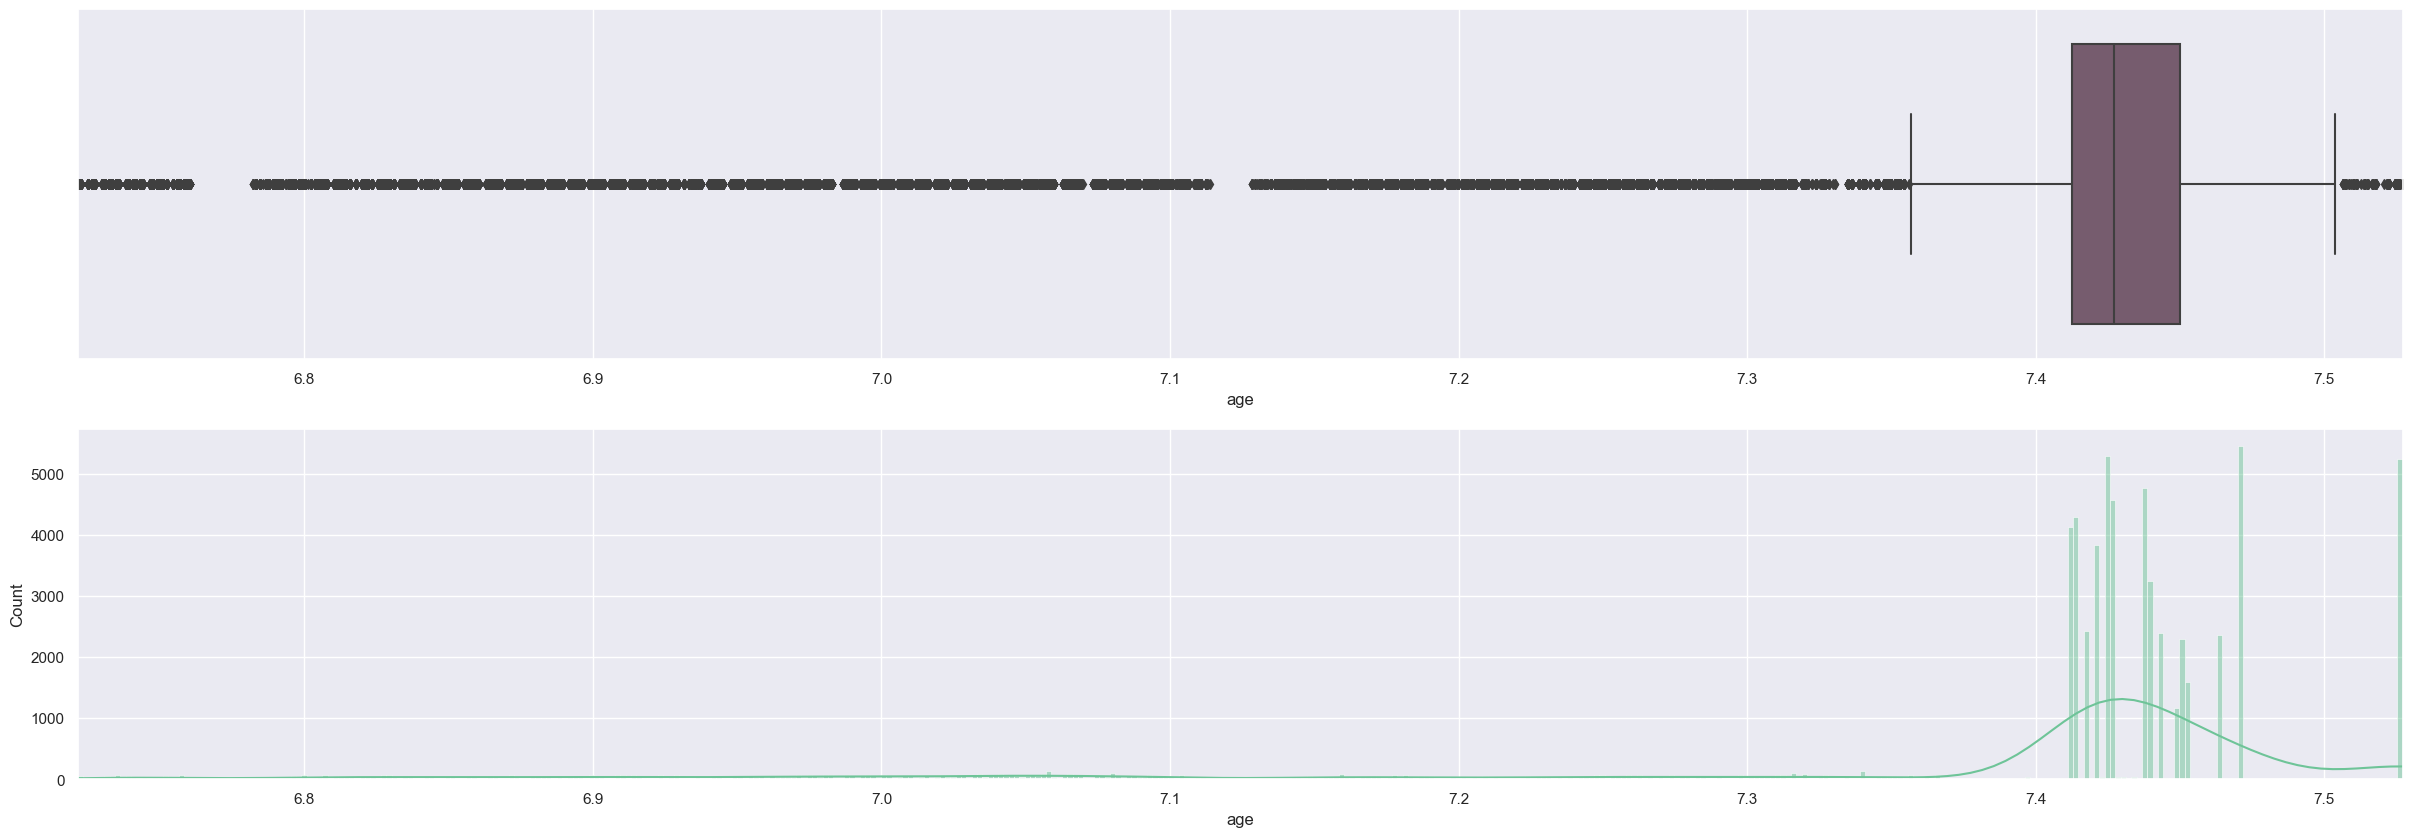

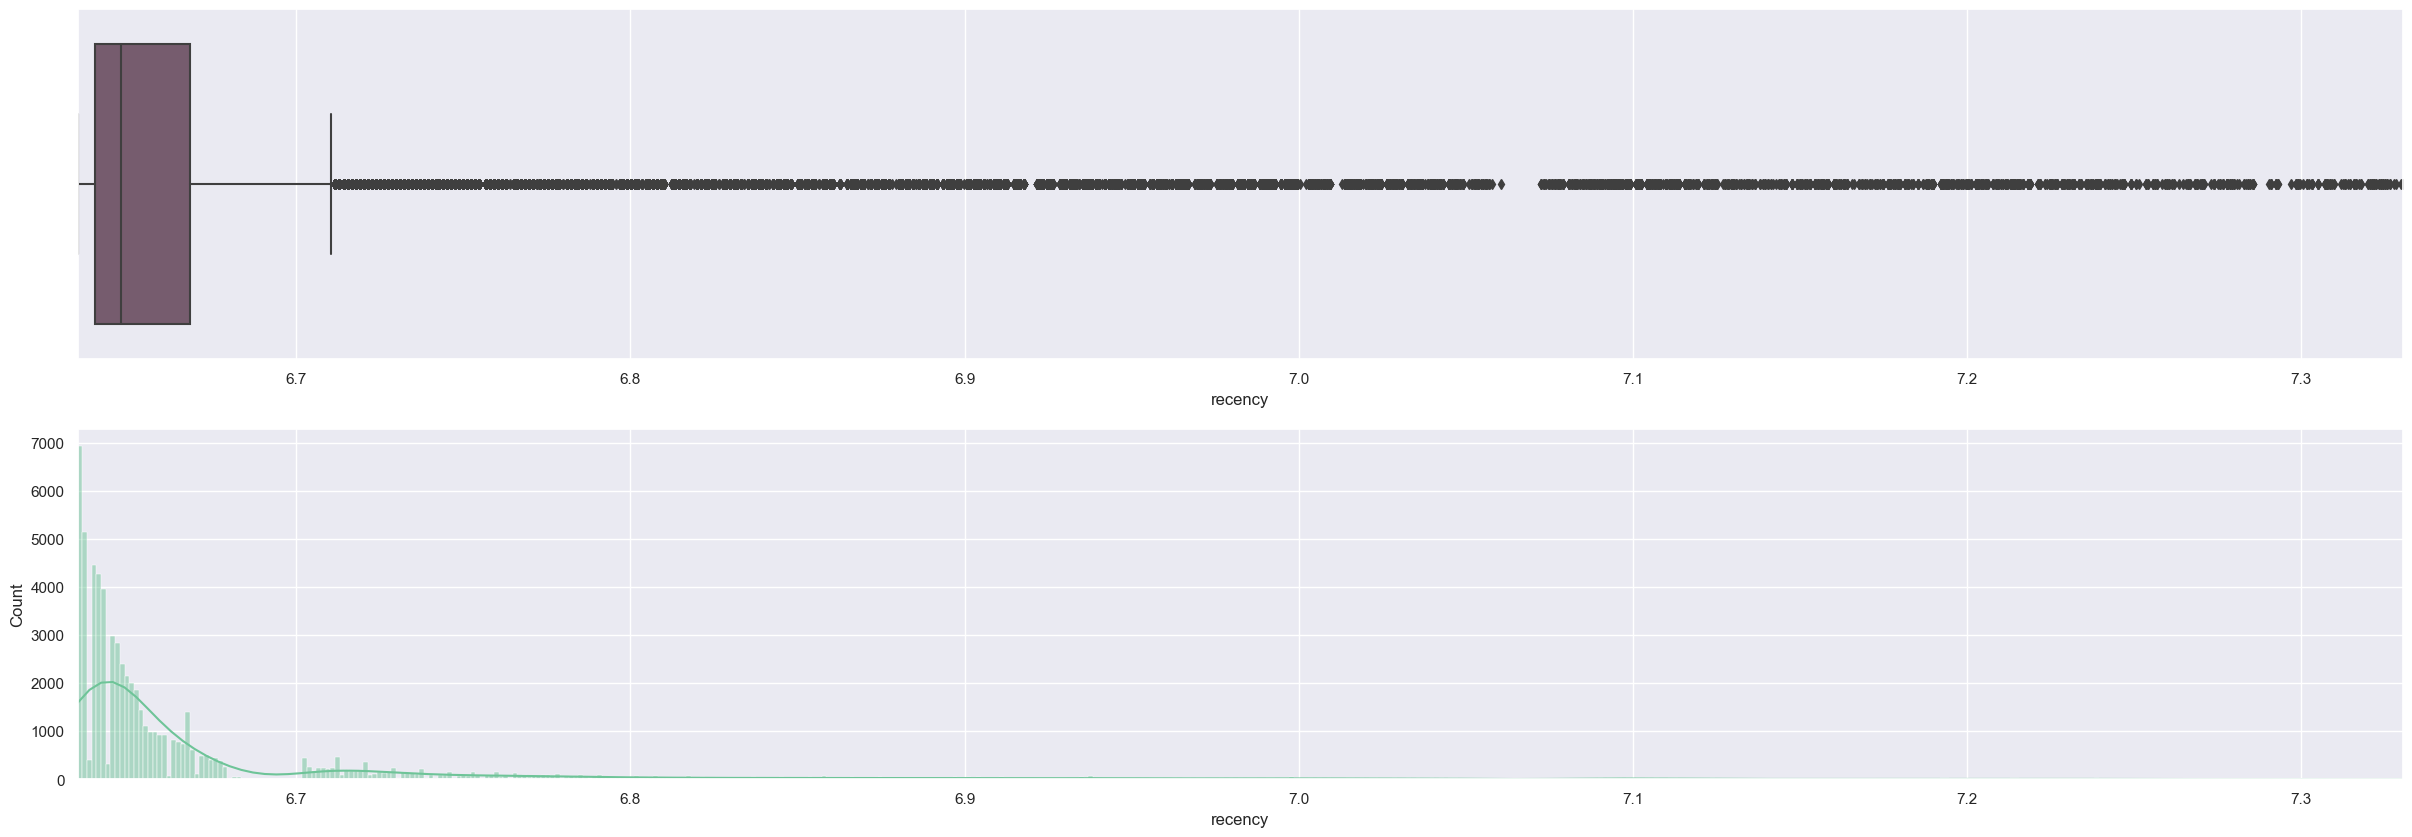

In [220]:
plt.rcParams["figure.figsize"] = [30,10]
sns.set(style="darkgrid")
palette = [  "#7a5870", "#6ec498"]
# fig, axs = plt.subplots(2, 6, sharex=True, figsize=(30, 20))
for i,v in enumerate(["Net_ Purchase(IRR)","Avg_Invoice_Row_No","Waste_Rate","Rejected_Rate",
                      "Avg_Purchase_In_Month","age","recency"]):
    ax=plt.subplot(2, 1, 1)
    left_lim=new_data[v].min()
    right_lim=new_data[v].max()
    ax.set_xlim(left_lim, right_lim)
    sns.boxplot(data=new_data, x=v ,color=palette[0])
    ax=plt.subplot(2, 1, 2)
    ax.set_xlim(left_lim,right_lim)

    sns.histplot(data=new_data, x=v, kde=True,color=palette[1])
    plt.show()

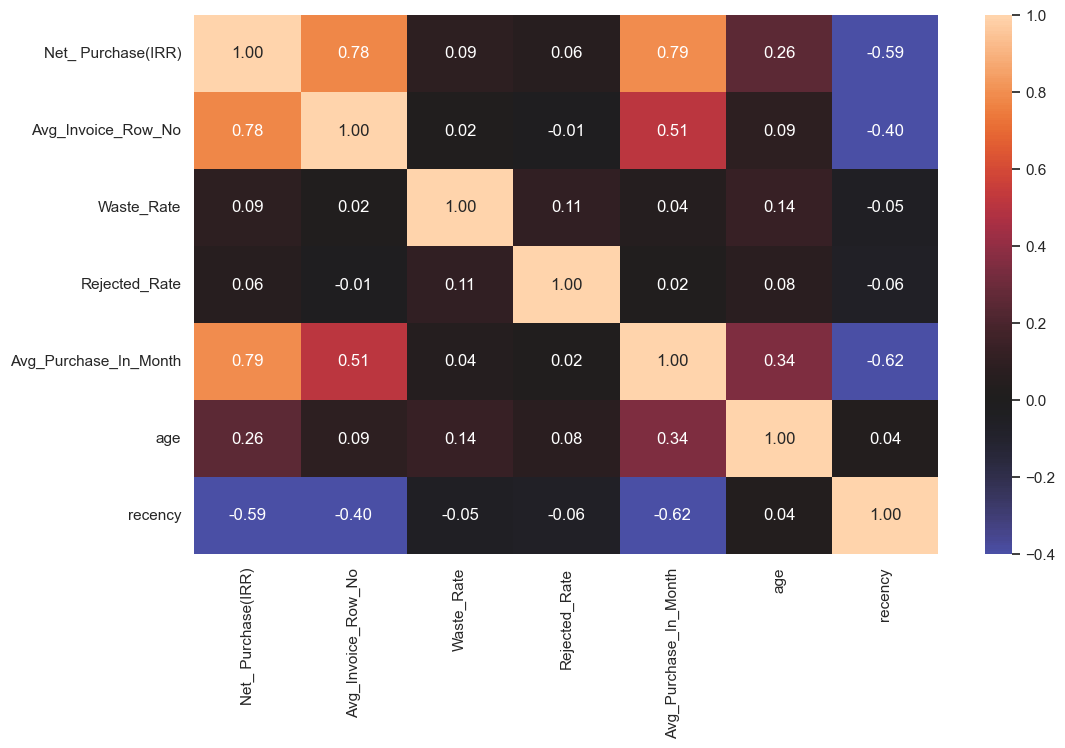

In [221]:
plt.figure(figsize=(12,7))
sns.heatmap(new_data.corr(), annot=True,fmt='.2f', vmin=-0.4, center=0)
plt.show()

### The Correlation heatmap:

**Interpretation of the Heatmap:**
The heatmap visually represents the correlation coefficients between different features in your dataset.
Darker colors (closer to red) indicate stronger positive correlations, while lighter colors (closer to blue) indicate weaker or negative correlations.

**Key Observations:**

1. **Net Purchase (IRR):**
Strong positive correlation with Avg_Purchase_In_Month (0.79).
Moderate negative correlation with recency (-0.59).

2. **Avg Invoice Row Number:**
Strong positive correlation with both Net Purchase (IRR) (0.78) and Avg_Purchase_In_Month (0.51).

3. **Waste Rate and Rejected Rate:**
No significant correlations with other features.

4. **Age and Recency:**
No strong correlations with other features.

**Implications:**

1. The high positive correlation between Net Purchase (IRR) and Avg_Purchase_In_Month suggests that customers who make larger purchases tend to do so consistently over time.
2. The negative correlation between Net Purchase (IRR) and recency indicates that recent interactions are associated with smaller purchases.

**Recommendations:**

1. Consider segmenting customers based on their purchasing behavior (e.g., high-value, low-value, frequent buyers).
2. Use these insights to tailor marketing strategies and improve customer engagement.

In [22]:
# Strip out the diagonal values for the next step
correlation_matrix=new_data.corr()
for x in range(len(new_data.columns)):
    correlation_matrix.iloc[x,x] = 0.0
correlation_matrix.abs().idxmax()

Net_ Purchase(IRR)       Avg_Purchase_In_Month
Avg_Invoice_Row_No          Net_ Purchase(IRR)
Waste_Rate                                 age
Rejected_Rate                       Waste_Rate
Avg_Purchase_In_Month       Net_ Purchase(IRR)
age                      Avg_Purchase_In_Month
recency                  Avg_Purchase_In_Month
dtype: object

### The maximum absolute correlation between features (excluding the diagonal values):

1. **Net Purchase (IRR) and Avg_Purchase_In_Month:**
These two features have the highest positive correlation (0.79).
Customers who make larger purchases tend to do so consistently over time.

2.  **Avg_Invoice_Row_No and Net Purchase (IRR): **
The average invoice row number is strongly positively correlated with net purchase (0.78).
Customers with more invoice rows tend to have higher net purchases.

3.  **Waste Rate and Age: **
Waste rate and age have a moderate positive correlation (0.26).
Older customers may exhibit slightly higher waste rates.

4.  **Rejected Rate and Waste Rate: **
Rejected rate and waste rate are positively correlated (0.09).
Customers with higher waste rates may also have higher rejected rates.

5.  **Recency and Avg_Purchase_In_Month: **
Recency (time since last interaction) is negatively correlated with average monthly purchases (-0.59).
Recent interactions are associated with smaller monthly purchases.

### Recommendations:

1. Consider using these pairs of correlated features for further analysis or segmentation.
2. Explore how these relationships impact customer behavior and tailor marketing strategies accordingly.

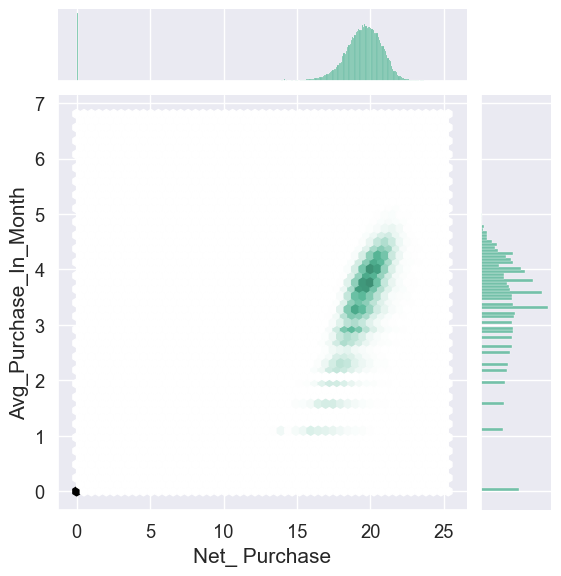

In [23]:
sns.set(font_scale=1.2)
j=sns.jointplot(x=new_data['Net_ Purchase(IRR)'], y=new_data['Avg_Purchase_In_Month'], kind='hex', color="#4CB391")
j.set_axis_labels('Net_ Purchase', 'Avg_Purchase_In_Month', fontsize=15)

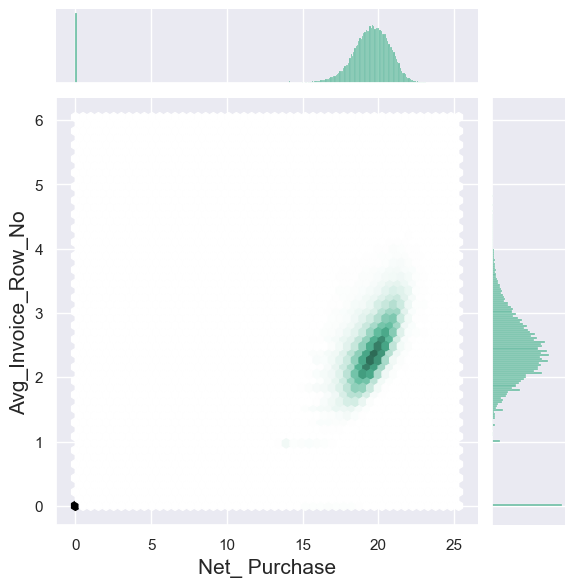

In [224]:
sns.set(font_scale=1)
j=sns.jointplot(x=new_data['Net_ Purchase(IRR)'], y=new_data['Avg_Invoice_Row_No'], kind='hex', color="#4CB391")
j.set_axis_labels('Net_ Purchase', 'Avg_Invoice_Row_No', fontsize=15)

In [24]:
new_data.drop(['Net_ Purchase(IRR)'],axis=1,inplace=True)

In [25]:
# ss = StandardScaler()
mm=MinMaxScaler()
# ScaledData=ss.fit_transform(new_data)
ScaledData=mm.fit_transform(new_data)
ScaledData = pd.DataFrame(ScaledData,columns=new_data.columns )
ScaledData.sample(5)

Avg_Invoice_Row_No  Waste_Rate  Rejected_Rate  Avg_Purchase_In_Month  \
33787                0.48        0.01           0.04                   0.66   
45727                0.34        0.09           0.00                   0.51   
64365                0.74        0.00           0.00                   0.34   
65093                0.52        0.00           0.00                   0.34   
64758                0.48        0.00           0.00                   0.16   

       age  recency  
33787 0.87     0.00  
45727 0.86     0.02  
64365 0.14     0.05  
65093 0.10     0.03  
64758 0.12     0.04

### To Find PCA, We Scale the data First:

1. Avg_Invoice_Row_No: The values seem to be scaled between 0 and 1. The highest value is 0.63, which suggests that the average invoice row number varies moderately across the dataset.

2. Waste_Rate: All values are 0, indicating that there is no waste rate in the data. If this is expected behavior, it’s worth noting.

3. Rejected_Rate: The values range from 0.00 to 0.88. A high rejected rate (close to 1) might indicate issues with product quality or manufacturing processes.

4. Avg_Purchase_In_Month: The values vary between 0.00 and 0.56. This feature represents the average purchase amount per month, and the scaling suggests some variability in purchasing behavior.

5. Age: The scaled values range from 0.04 to 0.90. This could represent the age of customers or products. The higher values may correspond to older entities.

6. Recency: The recency values are quite low (ranging from 0.01 to 0.02). This could indicate recent interactions or events related to the data.


In [26]:
ScaledData.isnull().sum()

Avg_Invoice_Row_No       0
Waste_Rate               0
Rejected_Rate            0
Avg_Purchase_In_Month    0
age                      0
recency                  0
dtype: int64

In [27]:
X = np.array(ScaledData)

In [28]:
pca = PCA(n_components=0.95, random_state=4)
X_P = pca.fit_transform(X)

In [29]:
print(np.round(pca.explained_variance_ratio_ * 100, 2))

[35.8  25.93 22.63  6.34  5.66]


In [30]:
print(np.round(pca.singular_values_ * 100, 2))

[5934.25 5050.4  4718.28 2496.46 2359.9 ]


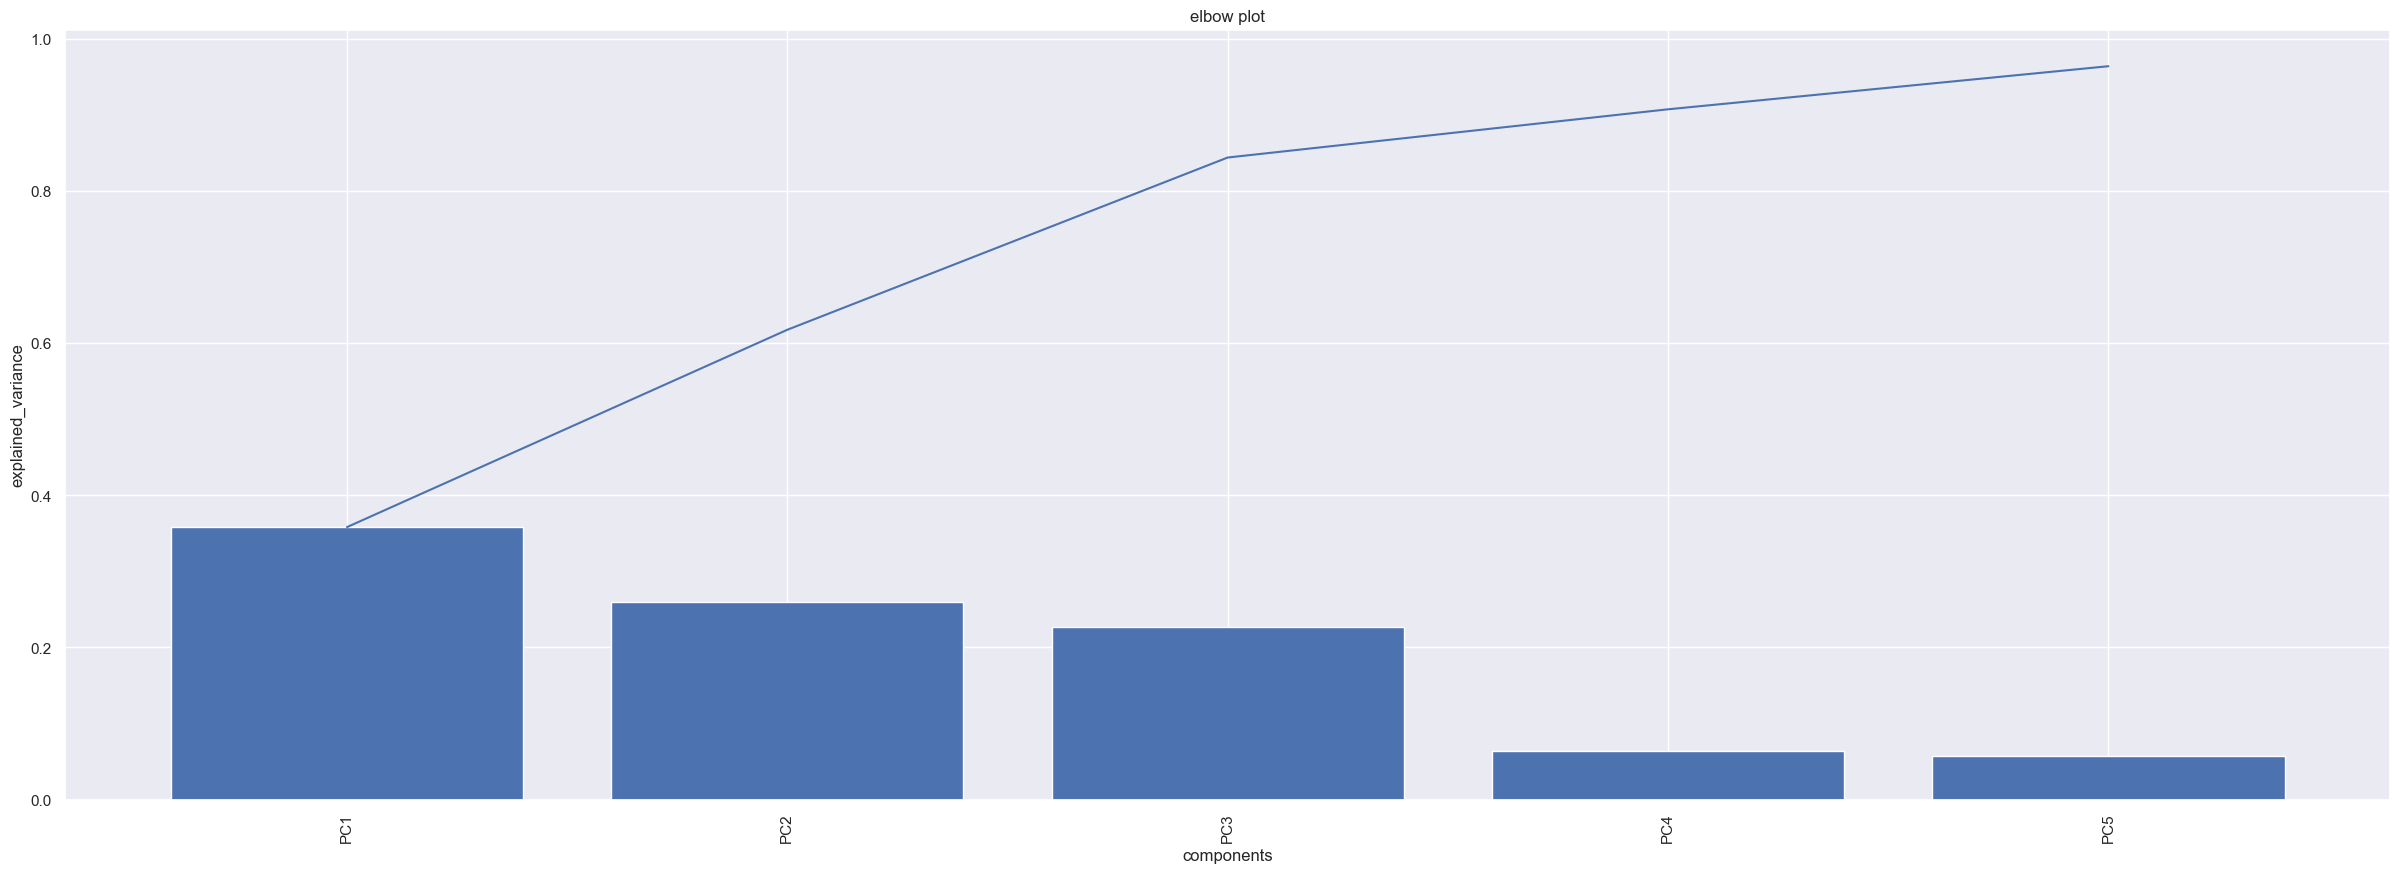

In [232]:
PC_list = ['PC'+str(i+1) for i in range(len(pca.explained_variance_ratio_))]
plt.bar(PC_list, pca.explained_variance_ratio_ )
plt.plot(np.cumsum(pca.explained_variance_ratio_ ))
plt.title('elbow plot')
plt.xlabel('components')
plt.ylabel('explained_variance')
plt.xticks(rotation=90);

## Elbow Plot Purpose:
1. The plot represents the explained variance by each principal component (PC) in a Principal Component Analysis (PCA).
2. The goal of PCA is to reduce the dimensionality of the data while retaining as much information (variance) as possible.
3. The elbow plot helps determine how many principal components are needed to capture most of the variation in the data.

## X-Axis (Components):
1. The x-axis shows the principal components (PC1, PC2, etc.).
2. Each bar represents a principal component.

## Y-Axis (Explained Variance):
1. The y-axis represents the explained variance.
2. Explained variance indicates how much of the total variance in the original data is captured by each principal component.
3.The cumulative explained variance is also shown as a line plot.

## Interpretation:

1. The first two principal components (PC1 and PC2) explain a significant amount of variance.
2. PC1 alone explains over 40% of the total variance, and PC2 adds around 30% more.
3. Beyond PC2, the explained variance increases more slowly.
4. The “elbow” point occurs where the curve starts to flatten out.
5. In this case, the elbow point suggests that using the first two components is sufficient to capture most of the data’s variation.

## Practical Implications:

1. Consider using only the first two principal components for dimensionality reduction.
2. These components retain most of the information while simplifying the data representation.
3. Further components may not significantly improve the model’s performance.

In [31]:
total_var = np.cumsum(pca.explained_variance_ratio_) * 100

for i in range(len(pca.explained_variance_ratio_)):
    print("PC {:2d}, explained var: {:.2f}".format(i+1, total_var[i]))

PC  1, explained var: 35.80
PC  2, explained var: 61.73
PC  3, explained var: 84.37
PC  4, explained var: 90.70
PC  5, explained var: 96.37


## PC1 (35.80% explained variance):
1. PC1 captures the most significant variation in the data.
2. It explains approximately 35.80% of the total variance.
3. This component likely represents the most dominant patterns or features in your dataset.

## PC2 (61.73% explained variance):
1. PC2 adds to the cumulative explained variance.
2. It contributes around 25.93% (61.73% - 35.80%) of the total variance.
3. Together with PC1, these two components explain a substantial portion of the data.

## PC3 (84.37% explained variance):
1. PC3 further increases the cumulative explained variance.
2. It contributes approximately 22.64% (84.37% - 61.73%) of the total variance.
3. The first three components now explain a significant majority of the data.

## PC4 (90.70% explained variance):
1. PC4 continues to add to the cumulative explained variance.
2. It contributes around 6.33% (90.70% - 84.37%) of the total variance.
3. By including PC4, we capture even more information from the original features.

## PC5 (96.37% explained variance):
1. PC5 provides a small additional boost to the cumulative explained variance.
2. It contributes approximately 5.67% (96.37% - 90.70%) of the total variance.
3. At this point, we’ve captured almost all relevant information from the data.

## Interpretation:
1. The first five principal components explain a substantial portion (96.37%) of the data’s variance.
2. Depending on your specific use case, you might choose to retain these components for dimensionality reduction or feature selection.
3. Further components (beyond PC5) contribute less to the overall variance and may not significantly impact the model’s performance.

In [32]:
pca_3 = PCA(n_components=3, random_state=4)
pca_3.fit(X)
print(np.round(pca_3.explained_variance_ratio_ * 100, 1))
X_3PC = pca_3.transform(X)

[35.8 25.9 22.6]


## The results of the PCA with three principal components (PCs):

### PC1 (35.8% explained variance):
1. PC1 explains approximately 35.8% of the total variance in the data.
2. This component likely captures the most significant patterns or features present in the original dataset.
3. It represents the dominant mode of variation across the features.

### PC2 (25.9% explained variance):
1. PC2 contributes an additional 25.9% of the total variance.
2. Together with PC1, these two components explain around 61.7% of the data.
3. PC2 captures orthogonal (uncorrelated) variation relative to PC1.

### PC3 (22.6% explained variance):
1. PC3 adds further information, explaining 22.6% of the total variance.
2. The cumulative explained variance now reaches 84.3% (35.8% + 25.9% + 22.6%).
3. PC3 likely captures additional patterns or relationships not captured by the first two components.

### Interpretation:
1. Using these three principal components, we retain a substantial amount of information from the original features.
2. The choice of retaining three components depends on the specific context and trade-offs between dimensionality reduction and information loss.
3. You may consider using these components for subsequent analyses or modeling.

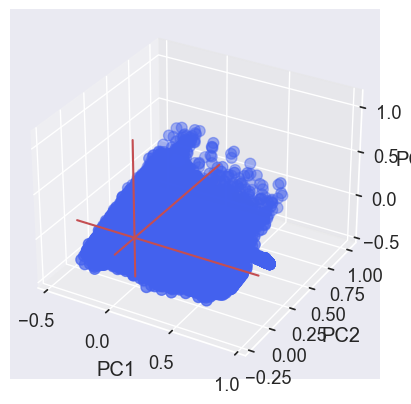

In [33]:
# Store results of PCA in a data frame
result=pd.DataFrame(X_3PC, columns=['PCA%i' % i for i in range(3)])
my_color = ["#3A0CA3", "#4361EE", "#4CC9F0"]
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color[1] ,  s=60, marker='o')


# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
#ax.view_init(120, 120)
plt.show()

In [34]:
WCSS=[]
C=[2,3,4,5,6]
for i in C:
  #PCA_K_Means=KMeans(n_clusters=i,init="k-means++",random_state=4,verbose=1)
  PCA_K_Means=KMeans(n_clusters=i,init="k-means++",random_state=4)
  PCA_K_Means.fit(X_3PC)
  WCSS.append(PCA_K_Means.inertia_)

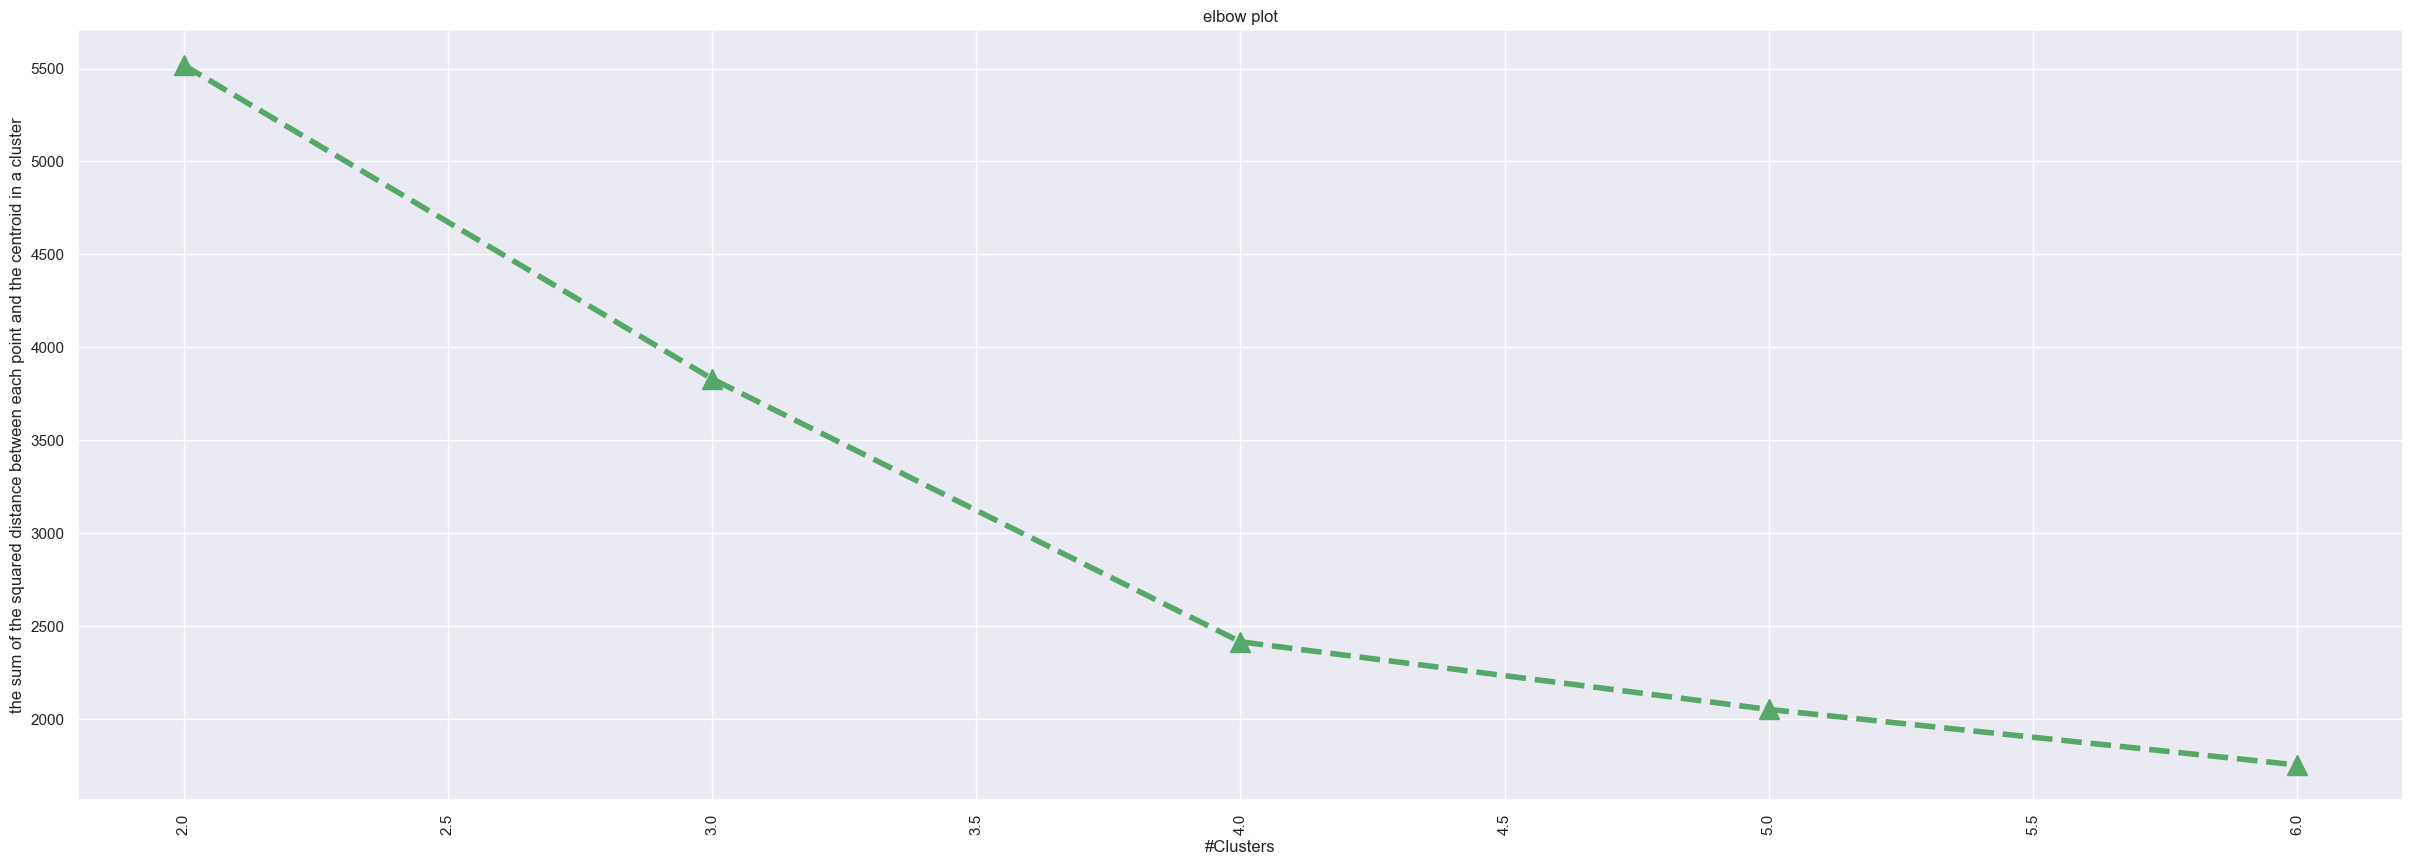

In [237]:
plt.plot(C,WCSS,'go--',marker='^',markersize=15,linewidth=4)
plt.title('elbow plot')
plt.xlabel('#Clusters')
plt.ylabel('the sum of the squared distance between each point and the centroid in a cluster')
plt.xticks(rotation=90);

### Elbow Plot Purpose:
1. The plot represents the Within-Cluster-Sum-of-Squares (WCSS) as a function of the number of clusters (k) in a K-Means clustering algorithm.
2. The WCSS measures the sum of squared distances between each data point and its assigned centroid within a cluster.
3. The “elbow” point on the plot helps determine the optimal number of clusters.

### X-Axis (Number of Clusters):
1. The x-axis shows the number of clusters (k).
2. You’ve tested values from 2 to 6 clusters.

### Y-Axis (WCSS):
1. The y-axis represents the WCSS.
2. Lower WCSS values indicate better clustering (tighter clusters).

### Interpretation:
1. The plot shows a decreasing trend in WCSS as the number of clusters increases.
2. The “elbow” point occurs where the WCSS starts to level off.
3. In your plot, the elbow point seems to be around 4 clusters.
4. Beyond 4 clusters, the reduction in WCSS is less significant.

### Practical Implications:
1. Based on the elbow method, 4 clusters might be a reasonable choice for your data.
2. However, consider the context and domain knowledge:
3. Do these clusters make sense in your specific problem?
4. Are there any business requirements or constraints that suggest a different number of clusters?
5. You can explore further by evaluating other metrics (e.g., silhouette score) or conducting additional analyses.

In [37]:
My_K_Means=KMeans(n_clusters=4,init="k-means++",random_state=4)
My_K_Means.fit(X_3PC)
df_pca_Kmeans=pd.concat([new_data.reset_index(drop=True),pd.DataFrame(X_3PC)],axis=1)
df_pca_Kmeans.columns.values[-3:]=['PCA1','PCA2','PCA3']
df_pca_Kmeans["Cluster"]=My_K_Means.labels_
df_pca_Kmeans


Avg_Invoice_Row_No  Waste_Rate  Rejected_Rate  Avg_Purchase_In_Month  \
0                    0.00        0.00           0.00                   0.00   
1                    0.00        0.00           0.00                   0.00   
2                    0.00        0.00           0.00                   0.00   
3                    0.00        0.00           0.00                   0.00   
4                    0.00        0.00           0.00                   0.00   
...                   ...         ...            ...                    ...   
66117                0.00        0.00           0.00                   0.00   
66118                0.00        0.00           0.00                   0.00   
66119                0.00        0.00           0.00                   0.00   
66120                0.00        0.00           0.00                   0.00   
66121                0.00        0.00           0.00                   0.00   

       age  recency  PCA1  PCA2  PCA3  Cluster  
0     7.51     7.32  0.28 -0.06  1.07        0  
1     7.51     7.30  0.27 -0.06  1.05        0  
2     7.48     7.29  0.31 -0.05  1.02        0  
3     7.47     7.29  0.31 -0.05  1.02        0  
4     7.46     7.32  0.33 -0.04  1.04        0  
...    ...      ...   ...   ...   ...      ...  
66117 6.72     6.64  0.96  0.13  0.01        1  
66118 6.72     6.64  0.96  0.13  0.01        1  
66119 6.72     6.64  0.96  0.13  0.01        1  
66120 6.72     6.64  0.96  0.13  0.01        1  
66121 6.72     6.64  0.96  0.13  0.01        1  

[66122 rows x 10 columns]

In [38]:
cluster_counts = df_pca_Kmeans["Cluster"].value_counts()

# Display the count of each cluster
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
Cluster
2    44676
3     9777
1     8346
0     3323
Name: count, dtype: int64


## Cluster 2 (44,676):
1. The largest cluster with 44,676 data points.
2. Represents a significant portion of the dataset.
3. Could indicate a common pattern or behavior shared by a large group of entities.

## Cluster 3 (9,777):
1. The second-largest cluster with 9,777 data points.
2. Smaller than Cluster 2 but still substantial.
3. Likely captures a distinct subset of the data.

## Cluster 1 (8,346):
1. The third-largest cluster with 8,346 data points.
2. Smaller than Clusters 2 and 3.
3. May represent another distinct pattern or behavior.

## Cluster 0 (3,323):
1. The smallest cluster with 3,323 data points.
2. Potentially represents a unique or outlier group.
3. Could be interesting for further investigation.

## Interpretation:
1. The distribution of data across clusters suggests heterogeneity in the dataset.
2. Consider exploring the characteristics of each cluster to understand their significance.
3. Domain knowledge or business context will help determine the practical implications of these clusters.

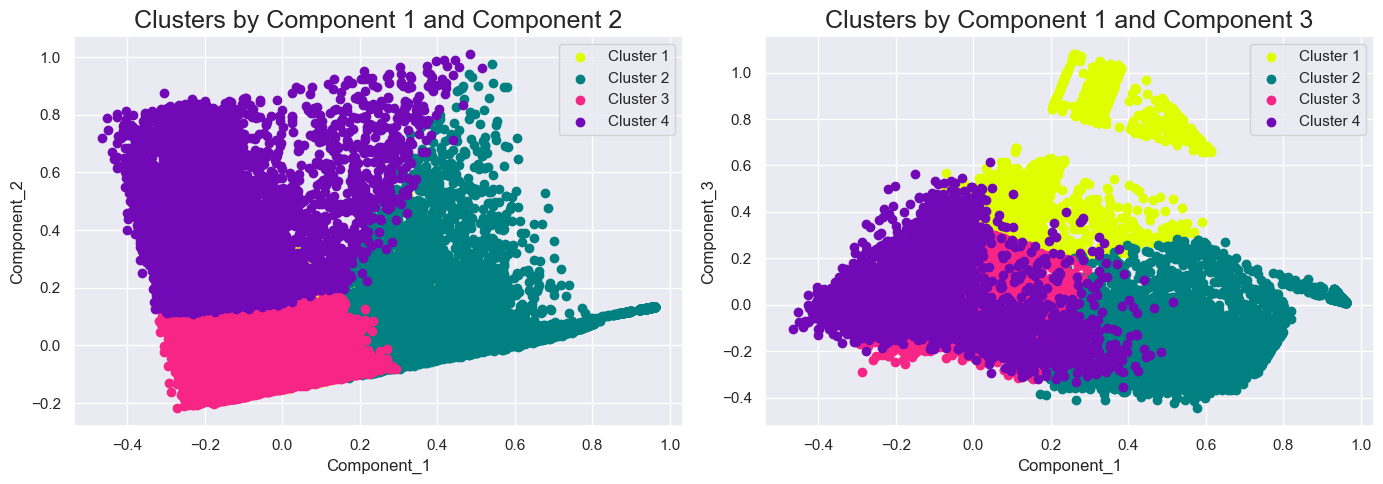

In [239]:
import matplotlib.pyplot as plt

# Number of clusters
num_clusters = 4

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Define a palette with enough colors
palette = ["#DFFF00", "#008080", "#F72585", "#7209B7"]

# Plotting the results for Component 1 and Component 2
for cluster in range(num_clusters):
    filtered_label = df_pca_Kmeans[df_pca_Kmeans['Cluster'] == cluster]
    axes[0].scatter(filtered_label['PCA1'], filtered_label['PCA2'], color=palette[cluster], label=f'Cluster {cluster + 1}')

axes[0].legend()
axes[0].set_title("Clusters by Component 1 and Component 2", fontsize=18)
axes[0].set_xlabel("Component_1")
axes[0].set_ylabel("Component_2")

# Plotting the results for Component 1 and Component 3
for cluster in range(num_clusters):
    filtered_label = df_pca_Kmeans[df_pca_Kmeans['Cluster'] == cluster]
    axes[1].scatter(filtered_label['PCA1'], filtered_label['PCA3'], color=palette[cluster], label=f'Cluster {cluster + 1}')

axes[1].legend()
axes[1].set_title("Clusters by Component 1 and Component 3", fontsize=18)
axes[1].set_xlabel("Component_1")
axes[1].set_ylabel("Component_3")

plt.tight_layout()
plt.show()


## The scatter plots analysis is below:

### Cluster Separation in Component 1 vs. Component 2:
1. The scatter plot on the left shows the relationship between Component 1 (x-axis) and Component 2 (y-axis).
2. Cluster 4 (teal points) is distinctly separated from the other clusters.
3. This separation suggests that Component 1 and Component 2 together capture a significant portion of the variation specific to Cluster 4.
4. Cluster 4 likely exhibits unique patterns or behaviors in these dimensions.

### Overlap in Component 1 vs. Component 3:
1. The scatter plot on the right shows the relationship between Component 1 (x-axis) and Component 3 (y-axis).
2. Cluster 4 (teal points) overlaps more with other clusters in this plot.
3. Component 3 does not contribute significantly to distinguishing Cluster 4 from the rest.
4. It suggests that Component 3 may not be as relevant for separating Cluster 4.

### Practical Implications:
1. If you’re interested in Cluster 4, focus on Component 1 and Component 2.
2. Consider further investigating the specific features or characteristics represented by these components.
3. Component 3 may not provide additional insights for Cluster 4.

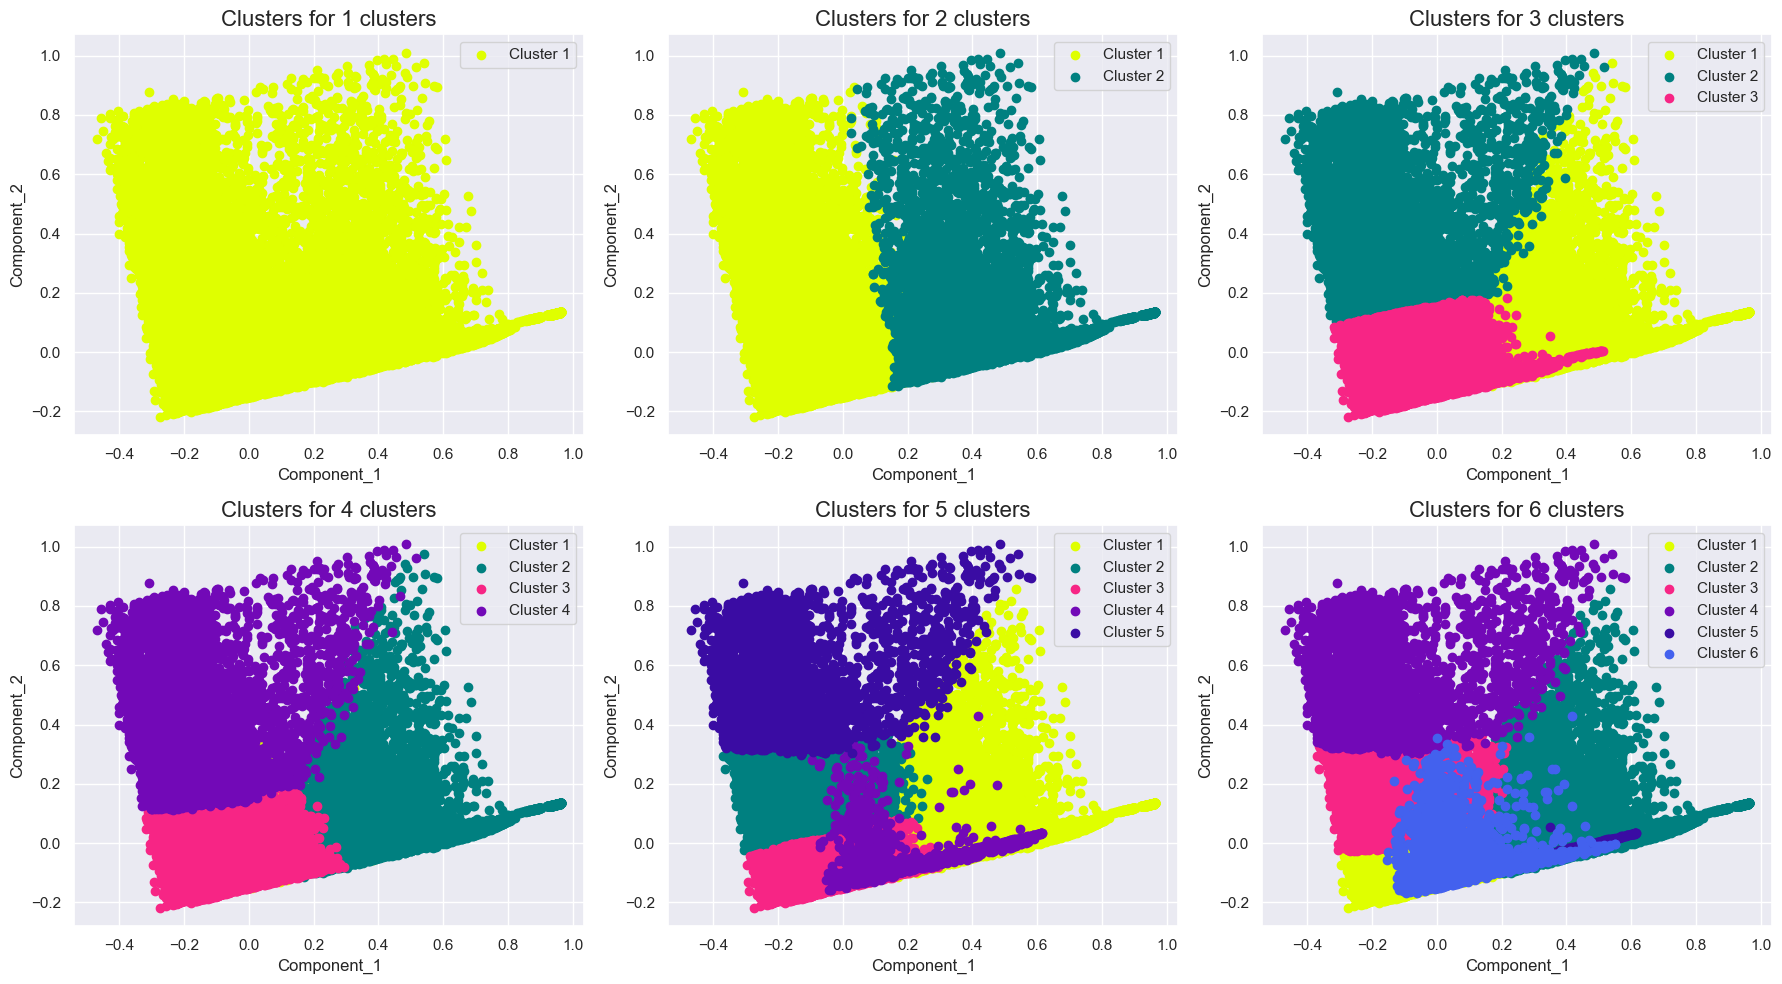

In [240]:
import matplotlib.pyplot as plt

# List of different numbers of clusters
num_clusters_list = [1, 2, 3, 4, 5, 6]

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Define a palette with enough colors
palette = ["#DFFF00", "#008080", "#F72585", "#7209B7", "#3A0CA3", "#4361EE"]

for i, num_clusters in enumerate(num_clusters_list):
    # Create KMeans model
    My_K_Means = KMeans(n_clusters=num_clusters, init="k-means++", random_state=4)
    My_K_Means.fit(X_3PC)
    
    # Add cluster labels to DataFrame
    df_pca_Kmeans[f"Cluster_{num_clusters}"] = My_K_Means.labels_
    
    # Plotting the results for Component 1 and Component 2
    for cluster in range(num_clusters):
        filtered_label = df_pca_Kmeans[df_pca_Kmeans[f'Cluster_{num_clusters}'] == cluster]
        axes[i].scatter(filtered_label['PCA1'], filtered_label['PCA2'], color=palette[cluster], label=f'Cluster {cluster + 1}')

    axes[i].legend()
    axes[i].set_title(f"Clusters for {num_clusters} clusters", fontsize=16)
    axes[i].set_xlabel("Component_1")
    axes[i].set_ylabel("Component_2")

plt.tight_layout()
plt.show()


# Agglomerative Clustering:

### Overview:
Agglomerative Clustering is a hierarchical clustering algorithm that builds a tree-like structure of clusters by iteratively merging the most similar clusters. It starts with each data point as a single-cluster and merges them until a single cluster containing all data points is formed. The result is a dendrogram, which can be cut at a desired level to obtain distinct clusters.

### How Agglomerative Clustering Works:

1. **Initialization:**
Begin with each data point as a separate cluster, resulting in N initial clusters for N data points.

2. **Similarity Calculation:**
Compute the similarity (distance) between all pairs of clusters. Various linkage criteria, such as ward, complete, or average linkage, determine how the similarity between clusters is measured.

3. **Merge Clusters:**
Identify and merge the two most similar clusters based on the chosen linkage criterion.

4. **Update Similarity Matrix:**
Recalculate the similarity matrix to incorporate the newly formed cluster.

5. **Repeat:**
Steps 2-4 are repeated until all data points belong to a single cluster or the desired number of clusters is achieved.

### Advantages of Agglomerative Clustering:

1. **Hierarchy Representation:**
Provides a hierarchical structure through the dendrogram, offering insights into the relationships between clusters at different levels.

2. **No Assumptions about Cluster Shape:**
Agglomerative clustering does not assume a particular shape for clusters, making it more flexible in handling various cluster structures.

3. **No Need to Specify the Number of Clusters:**
The algorithm does not require the user to specify the number of clusters beforehand, making it suitable for scenarios where the optimal cluster count is unknown.

4. **Robustness to Noise:**
Can be more robust to noise and outliers compared to K-Means.

### Disadvantages of Agglomerative Clustering:

1. **Computational Complexity:**
Agglomerative clustering can be computationally expensive, especially for large datasets.

2. **Memory Usage:**
The method requires storing a dense similarity matrix, leading to high memory usage.

3. **Sensitivity to Linkage Criteria:**
The choice of linkage criterion can impact the resulting clusters, and different criteria may yield different outcomes.

In [241]:
# My_AgglomerativeClustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward' ,memory='mycachedir')
My_AgglomerativeClustering = AgglomerativeClustering(n_clusters=4, linkage='single' ,memory='mycachedir')
My_AgglomerativeClustering.fit(X_3PC)
My_AgglomerativeClustering.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

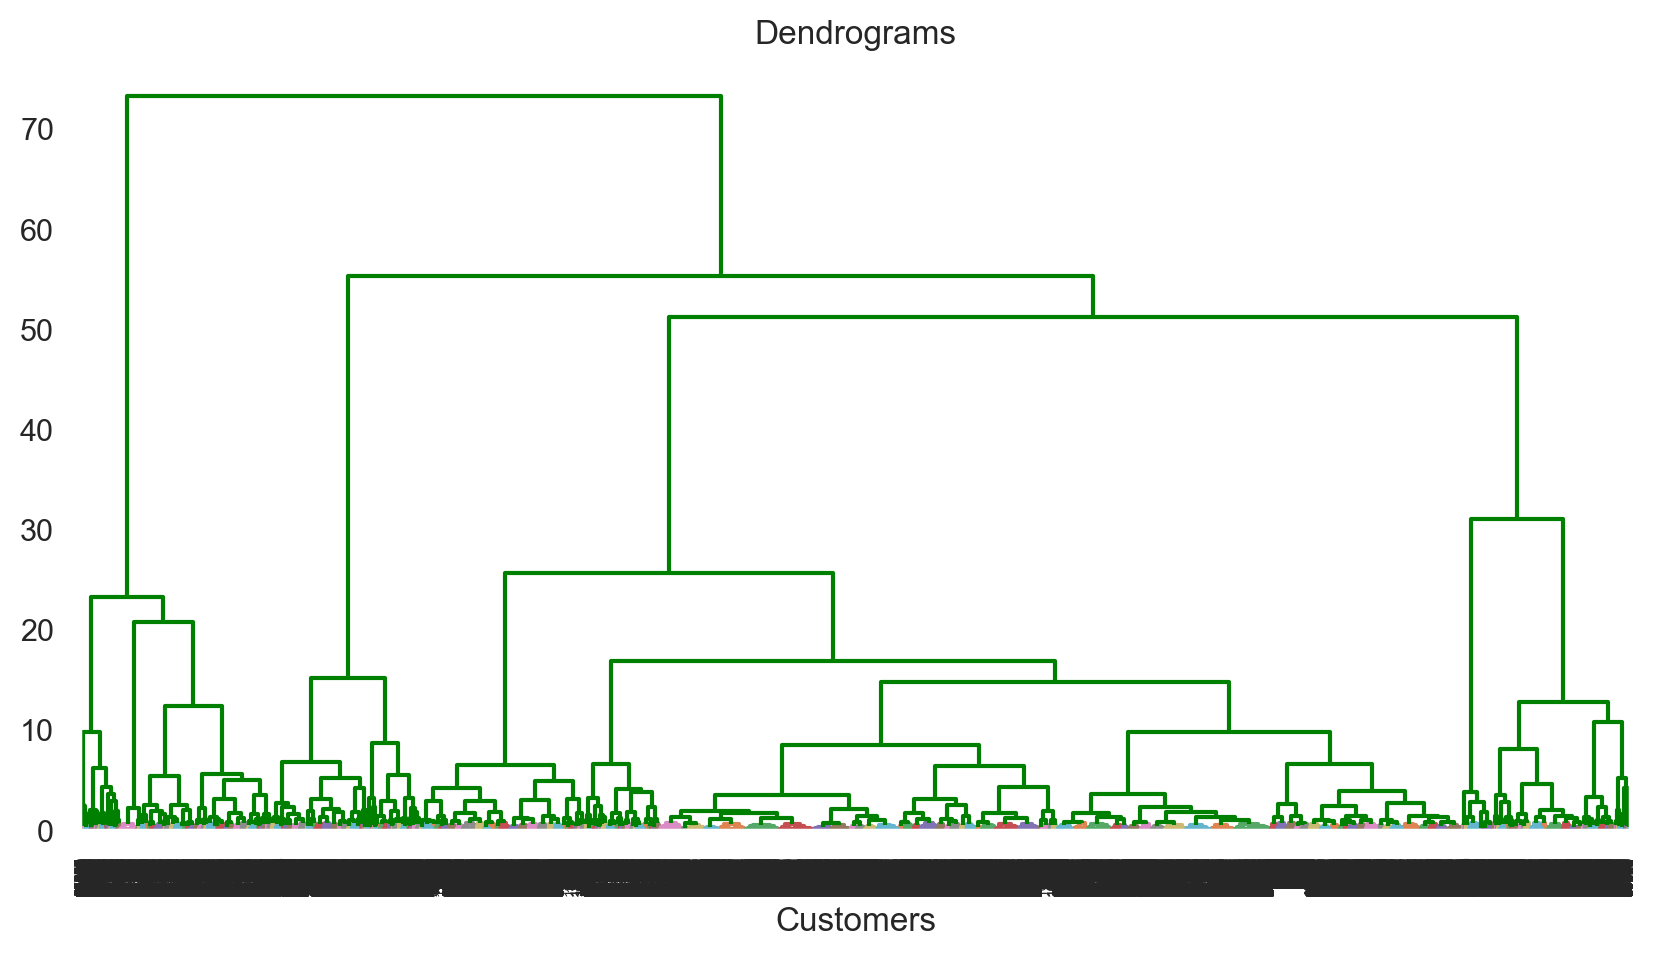

In [255]:
 plt.figure(figsize=(10,5), dpi = 200)
 # Plot the hierarchical clustering as a dendrogram.
 selected_data = pd.DataFrame(X_3PC).iloc[0:200, :]
 temp =shc.linkage(X_3PC, method='ward',  ## Single  Complete Average Weighted  Centroid
             metric="euclidean")
 dn = shc.dendrogram(
     temp, above_threshold_color="green", color_threshold=.7)
 plt.xlabel('Customers')
 plt.title('Dendrograms')
 plt.show()

## The Dendrogram resulting from Agglomerative Clustering:

### Dendrogram Purpose:
1. The dendrogram visually represents the hierarchical structure of clusters formed by the Agglomerative Clustering algorithm.
2. It shows how data points (customers, in this case) are grouped together based on their similarity.

### Dendrogram Interpretation:
1. The dendrogram consists of branches (lines) that connect data points (leaves) at different levels.
2. Each leaf represents an individual customer.
3. The vertical height of each branch represents the dissimilarity (distance) between the clusters it connects.
4. The color threshold (green) indicates where the dendrogram is cut to form a specific number of clusters.

### Observations:
1. The dendrogram has two main branches (primary clusters):
2. The left branch represents one large cluster (Cluster 1).
3. The right branch represents another large cluster (Cluster 0).
4. Within Cluster 1, there are further sub-branches, suggesting additional sub-clusters.
5. Cluster 0 does not have such distinct sub-branches, indicating more homogeneity within this group.
6. The choice of where to cut the dendrogram (color threshold) determines the number of clusters.

### Practical Implications:
1. If you’re interested in segmenting customers, consider cutting the dendrogram at an appropriate height to form a desired number of clusters.
2. Investigate the characteristics of each cluster to understand their behavior or preferences.
3. The hierarchical structure provides insights into how customers are related and grouped.

In [242]:
df_pca_Agglomerative=pd.concat([new_data.reset_index(drop=True),pd.DataFrame(X_3PC)],axis=1)
df_pca_Agglomerative.columns.values[-3:]=['PCA1','PCA2','PCA3']
df_pca_Agglomerative["Cluster"]=My_AgglomerativeClustering.labels_
df_pca_Agglomerative.sample(5)

Avg_Invoice_Row_No  Waste_Rate  Rejected_Rate  Avg_Purchase_In_Month  \
59584                3.03        0.01           0.00                   4.55   
46851                2.21        0.24           0.08                   4.01   
13315                2.34        0.02           0.01                   3.81   
31586                2.00        0.01           0.00                   3.40   
54023                2.75        0.01           0.00                   3.33   

       age  recency  PCA1  PCA2  PCA3  Cluster  
59584 7.05     6.68  0.29 -0.08 -0.30        0  
46851 7.41     6.64 -0.11 -0.03 -0.06        0  
13315 7.45     6.64 -0.09 -0.14 -0.04        0  
31586 7.43     6.65 -0.03 -0.14  0.01        0  
54023 7.34     6.76  0.07 -0.13  0.04        0

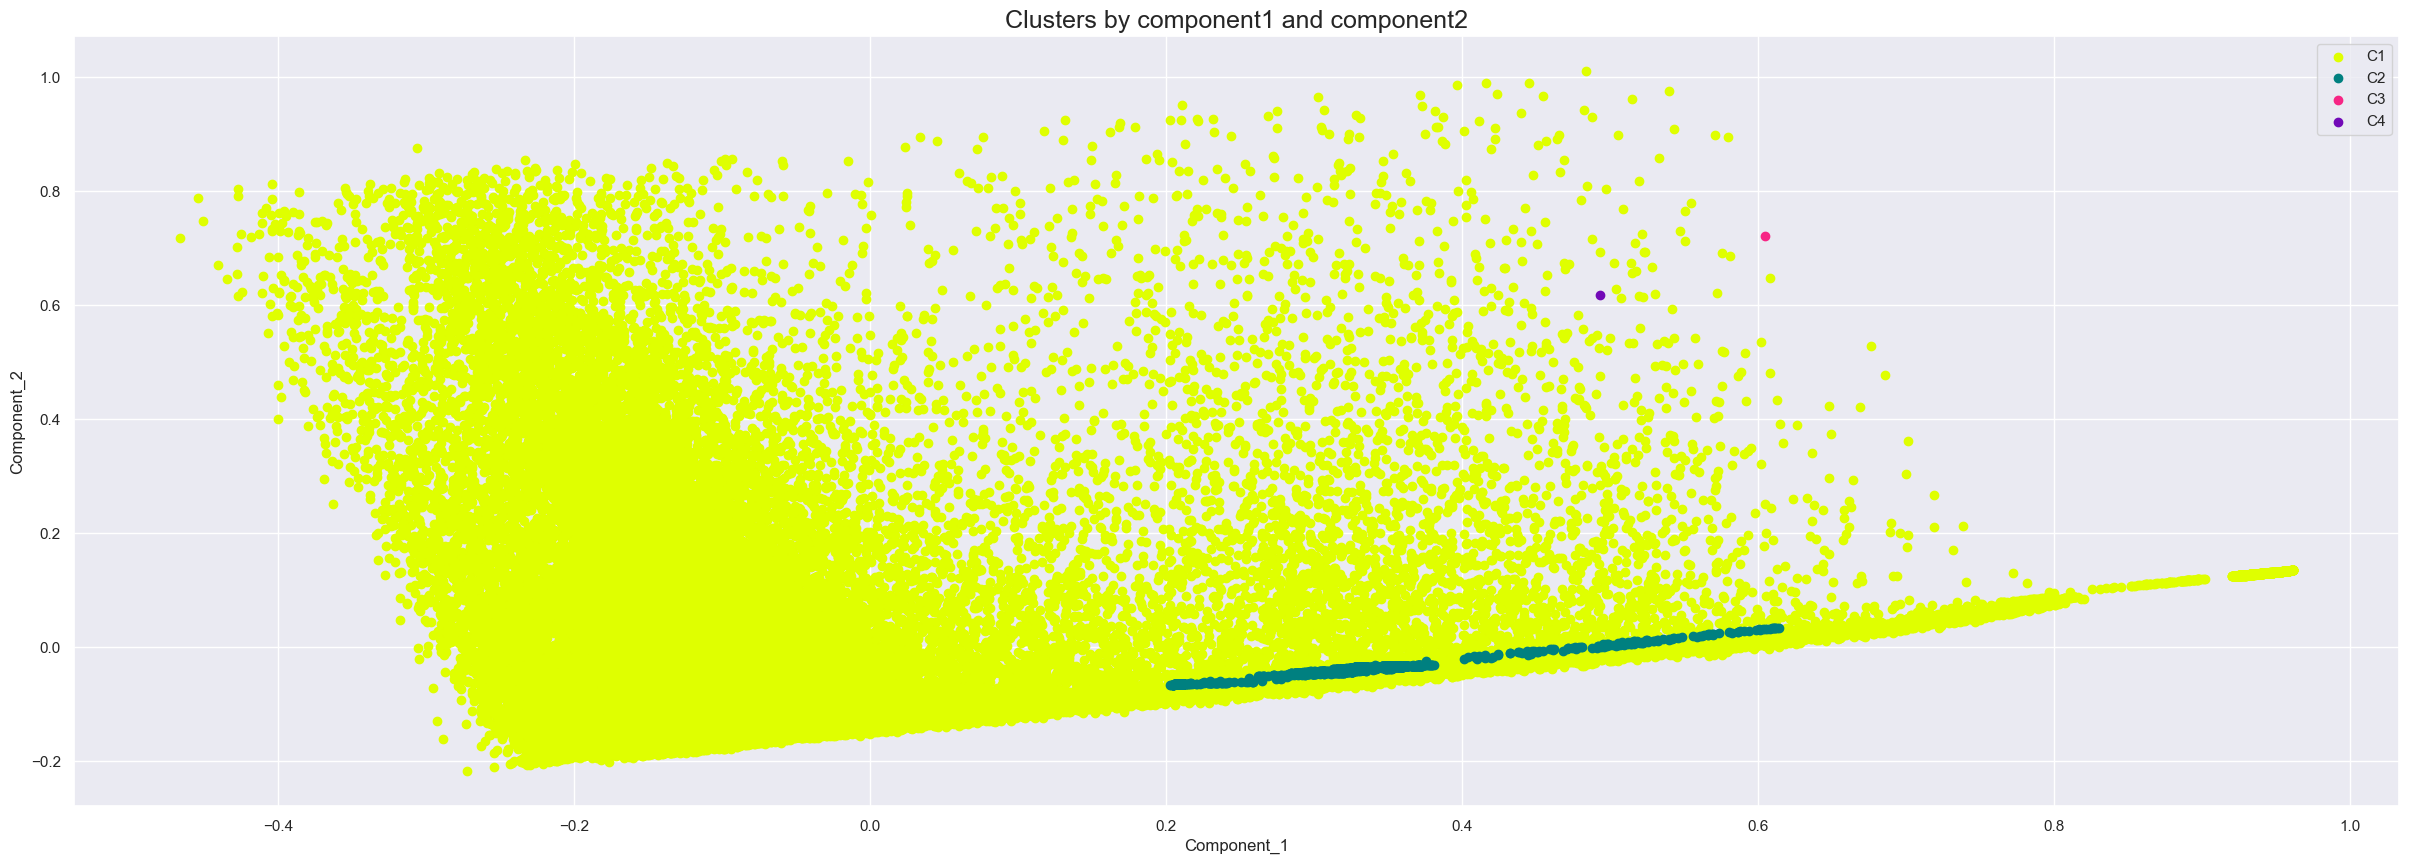

In [243]:
#filter rows of original data
filtered_label0 = df_pca_Agglomerative[df_pca_Agglomerative['Cluster'] == 0]
filtered_label1 = df_pca_Agglomerative[df_pca_Agglomerative['Cluster'] == 1]
filtered_label2 = df_pca_Agglomerative[df_pca_Agglomerative['Cluster'] == 2]
filtered_label3 = df_pca_Agglomerative[df_pca_Agglomerative['Cluster'] == 3]
palette = ["#DFFF00","#008080","#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]
#Plotting the results
plt.scatter(filtered_label0['PCA1'] , filtered_label0['PCA2'] , color =palette[0] , label = 'C1')
plt.scatter(filtered_label1['PCA1'] , filtered_label1['PCA2'] , color =palette[1], label = 'C2' )
plt.scatter(filtered_label2['PCA1'] , filtered_label2['PCA2'] , color =palette[2], label = 'C3' )
plt.scatter(filtered_label3['PCA1'] , filtered_label3['PCA2'] , color =palette[3], label = 'C4' )
plt.legend()
plt.title("Clusters by component1 and component2", fontsize=18)
plt.xlabel("Component_1")
plt.ylabel("Component_2")
plt.show()

# The scatter plot resulting from Agglomerative Clustering using Component 1 and Component 2:

### Cluster Separation:
1. The scatter plot displays four distinct clusters (C1, C2, C3, and C4) based on the values of Component 1 (x-axis) and Component 2 (y-axis).
2. Each cluster is represented by a different color.

## Cluster Characteristics:

### Cluster C1 (Yellow):
1. This is the largest cluster, densely populated in the top left quadrant.
2. Customers in this cluster exhibit similar patterns or behaviors related to Component 1 and Component 2.

### Cluster C2 (Teal):
1. Smaller than C1, scattered across the bottom right quadrant.
2. Represents a distinct subset of customers.

### Cluster C3 (Pink):
1. Contains very few data points, scattered sporadically in the bottom left quadrant.
2. Likely represents a specific subgroup with unique characteristics.

### Cluster C4 (Purple):
1. Also has minimal data points, overlapping with other clusters.
2. May not be as distinct in Component 1 and Component 2.

### Interpretation:
1. Component 1 and Component 2 play a significant role in separating the clusters.
2. Cluster C1 dominates the plot, while C3 and C4 are less prominent.
3. Consider investigating the features associated with each cluster to understand their relevance.

### Practical Implications:
1. If you’re segmenting customers, focus on the characteristics captured by Component 1 and Component 2.
2. Cluster C1 likely represents a broad customer group, while C3 and C4 may be more specialized.
3. Use this information for targeted marketing or personalized strategies.

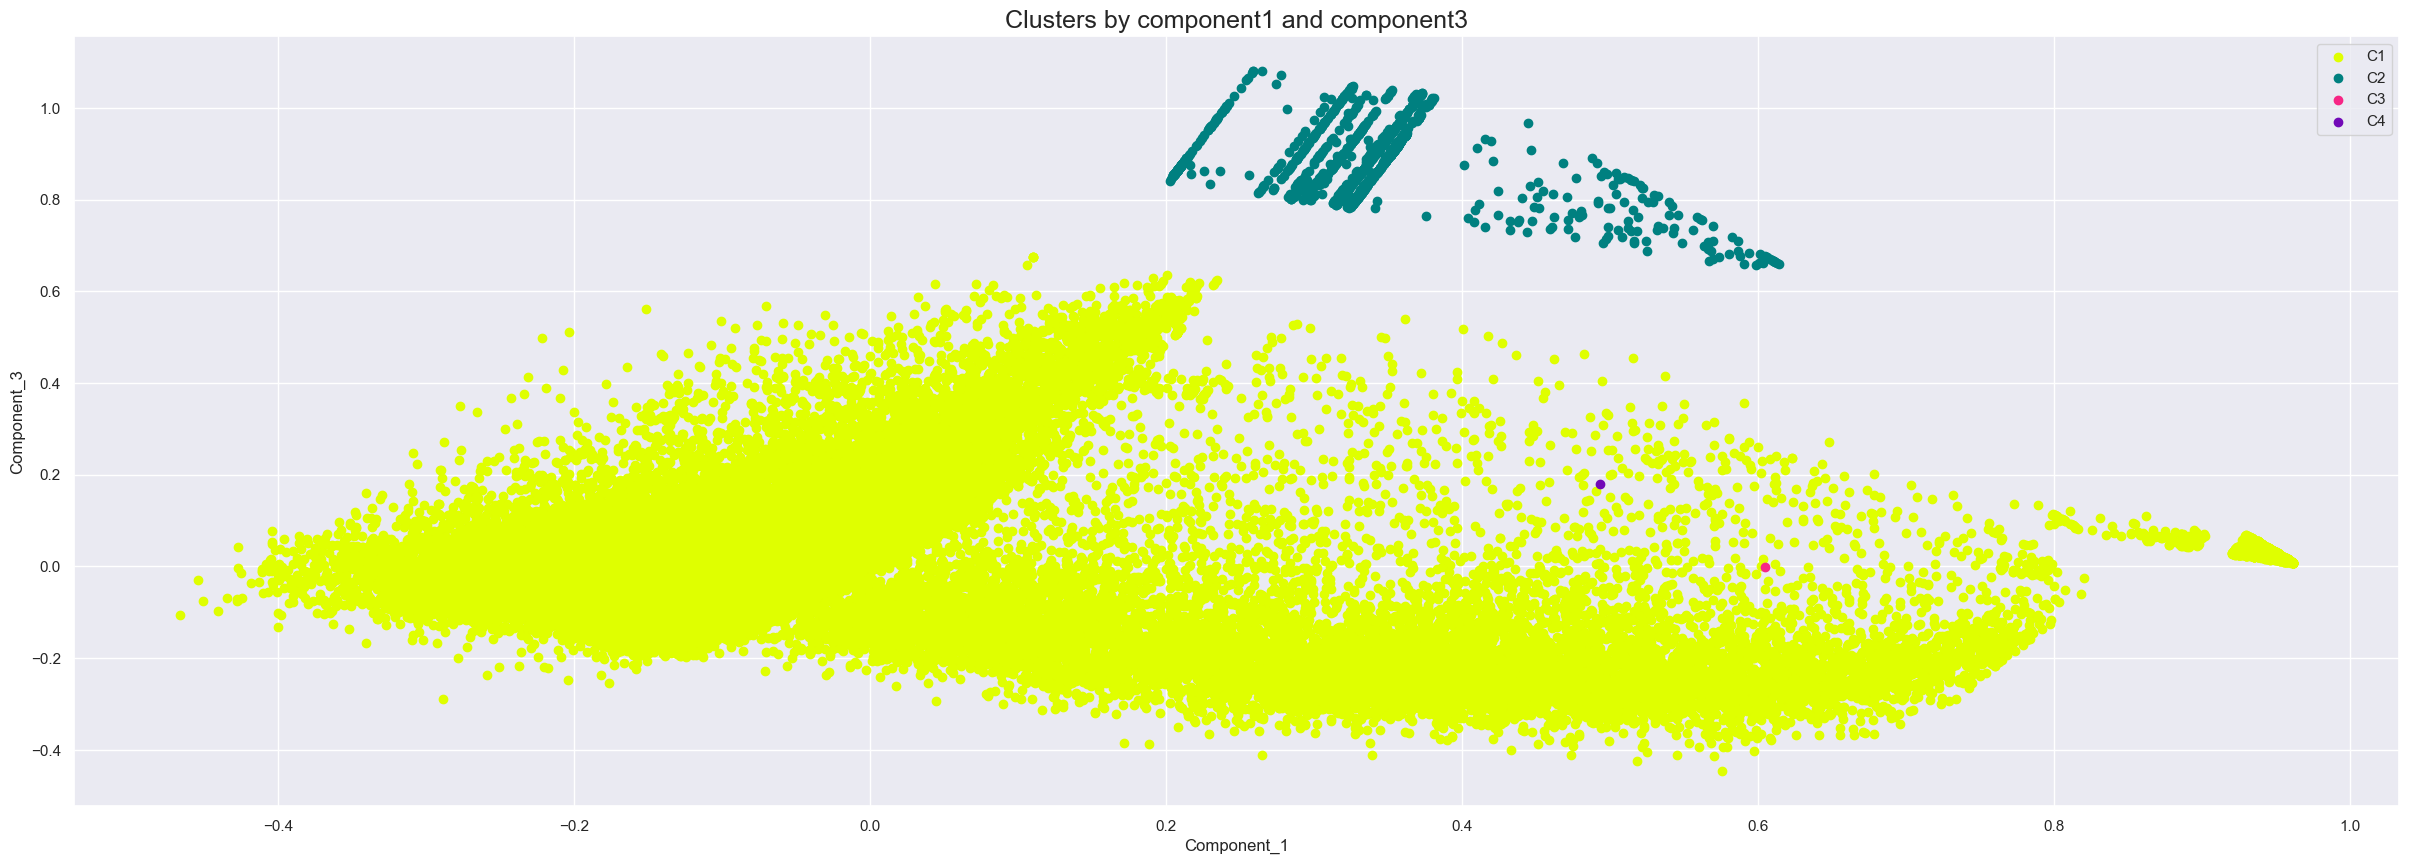

In [244]:
#filter rows of original data
filtered_label0 = df_pca_Agglomerative[df_pca_Agglomerative['Cluster'] == 0]
filtered_label1 = df_pca_Agglomerative[df_pca_Agglomerative['Cluster'] == 1]
filtered_label2 = df_pca_Agglomerative[df_pca_Agglomerative['Cluster'] == 2]
filtered_label3 = df_pca_Agglomerative[df_pca_Agglomerative['Cluster'] == 3]
palette = ["#DFFF00","#008080","#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]
#Plotting the results
plt.scatter(filtered_label0['PCA1'] , filtered_label0['PCA3'] , color =palette[0] , label = 'C1')
plt.scatter(filtered_label1['PCA1'] , filtered_label1['PCA3'] , color =palette[1], label = 'C2' )
plt.scatter(filtered_label2['PCA1'] , filtered_label2['PCA3'] , color =palette[2], label = 'C3' )
plt.scatter(filtered_label3['PCA1'] , filtered_label3['PCA3'] , color =palette[3], label = 'C4' )
plt.legend()
plt.title("Clusters by component1 and component3", fontsize=18)
plt.xlabel("Component_1")
plt.ylabel("Component_3")
plt.show()

## The scatter plot resulting from Agglomerative Clustering using Component 1 and Component 3:

### Cluster Separation:
1. The scatter plot displays four distinct clusters (C1, C2, C3, and C4) based on the values of Component 1 (x-axis) and Component 3 (y-axis).
2. Each cluster is represented by a different color.

## Cluster Characteristics:

### Cluster C1 (Yellow):
1. This is the largest cluster, spreading across a wide range of Component 1 and Component 3 values.
2. Indicates a large group of data points that share similar characteristics but are more dispersed compared to other clusters.

### Cluster C2 (Teal):
1. Positioned at the top right corner with higher Component 3 values and mid-range Component 1 values.
2. The data points in this cluster are tightly packed, indicating strong similarity among them.

### Cluster C3 (Pink):
1. Contains very few data points, scattered sporadically in the bottom left quadrant.
2. Likely represents a specific subgroup with unique characteristics.

### Cluster C4 (Purple):
1. Appears as a small, dense cluster with high Component 3 values and positive Component 1 values.

### Interpretation:
1. Component 1 and Component 3 play a significant role in separating the clusters.
2. Cluster C1 dominates the plot, while C3 and C4 are less prominent.
3. Consider investigating the features associated with each cluster to understand their relevance.

### Practical Implications:
1. If you’re segmenting customers, focus on the characteristics captured by Component 1 and Component 3.
2. Cluster C1 likely represents a broad customer group, while C3 and C4 may be more specialized.
3. Use this information for targeted marketing or personalized strategies.

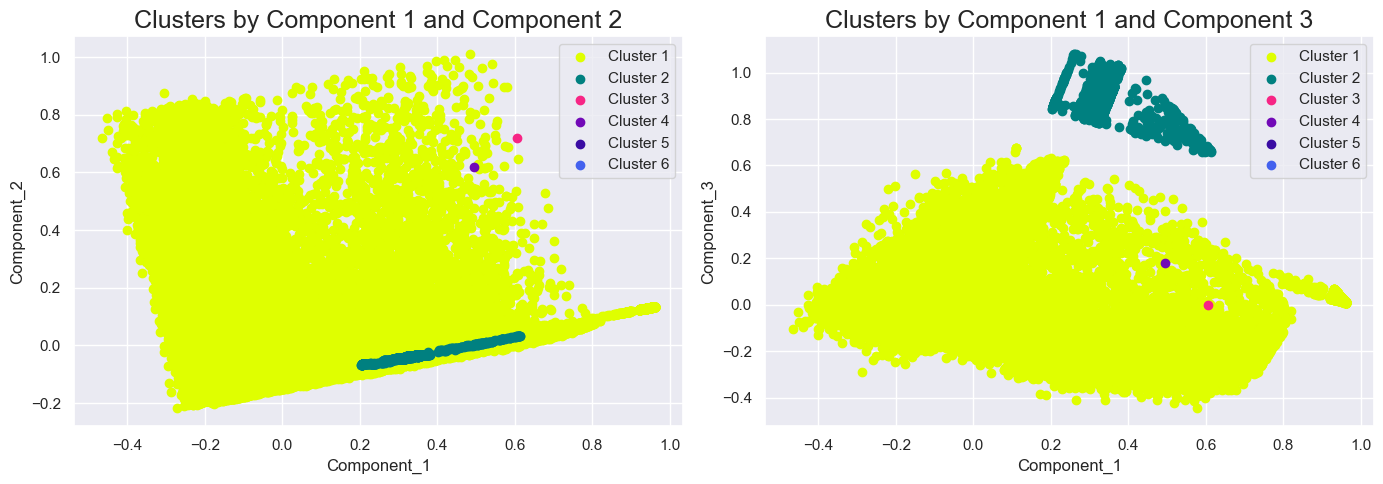

In [245]:
import matplotlib.pyplot as plt

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plotting the results for Component 1 and Component 2
for cluster in range(num_clusters):
    filtered_label = df_pca_Agglomerative[df_pca_Agglomerative['Cluster'] == cluster]
    axes[0].scatter(filtered_label['PCA1'], filtered_label['PCA2'], color=palette[cluster], label=f'Cluster {cluster + 1}')

axes[0].legend()
axes[0].set_title("Clusters by Component 1 and Component 2", fontsize=18)
axes[0].set_xlabel("Component_1")
axes[0].set_ylabel("Component_2")

# Plotting the results for Component 1 and Component 3
for cluster in range(num_clusters):
    filtered_label = df_pca_Agglomerative[df_pca_Agglomerative['Cluster'] == cluster]
    axes[1].scatter(filtered_label['PCA1'], filtered_label['PCA3'], color=palette[cluster], label=f'Cluster {cluster + 1}')

axes[1].legend()
axes[1].set_title("Clusters by Component 1 and Component 3", fontsize=18)
axes[1].set_xlabel("Component_1")
axes[1].set_ylabel("Component_3")

plt.tight_layout()
plt.show()


# Comparision Component 1 with both Component 2 and Component 3:

## Component 1 vs. Component 2:

### Component 1 (x-axis):
1. Represents a specific linear combination of original features.
2. It captures the most significant variation in the data.
3. Data points with higher Component 1 values are likely to exhibit similar patterns.

### Component 2 (y-axis):
1. Represents another linear combination of features orthogonal to Component 1.
2. It captures additional variation not explained by Component 1.
3. Data points with higher Component 2 values may have distinct characteristics.

## Component 1 vs. Component 3:

### Component 3 (y-axis):
1. Represents a different linear combination of features.
2. It captures variation orthogonal to both Component 1 and Component 2.
3. Data points with higher Component 3 values may exhibit unique behavior.

## Comparison:
1. If Component 1 and Component 2 are strongly correlated, they may represent similar aspects of the data.
2. If Component 3 is orthogonal to both, it captures additional information not captured by the first two components.

# DBSCAN Clustering

### Overview:
Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a density-based clustering algorithm that groups data points into clusters based on their density distribution. Unlike K-Means and Agglomerative Clustering, DBSCAN does not require the number of clusters to be specified beforehand and is effective in identifying clusters of arbitrary shapes.

### How DBSCAN Works:

1. **Core Points and Neighborhoods:**
Define a core point as a data point with at least a minimum number of data points (MinPts) within a specified radius (Eps). Form neighborhoods around core points.

2. **Density Reachability:**
A data point is considered density-reachable from another if there is a chain of core points connecting them, indicating sufficient local density.

3. **Cluster Formation:**
Form clusters by connecting density-reachable data points. A cluster is a maximal set of density-connected points.

4. **Outliers:**
Identify points that are not core points and not density-reachable from any core point as outliers or noise.

### Advantages of DBSCAN:

1. **Flexibility in Cluster Shapes:**
DBSCAN can identify clusters of arbitrary shapes and is not constrained by assumptions about cluster geometry.

2. **Automatic Cluster Detection:**
Does not require the number of clusters to be specified in advance, making it suitable for datasets with varying cluster densities.

3. **Robust to Outliers:**
DBSCAN is less sensitive to outliers and noise, classifying them as individual points outside clusters.

4. **Handling of Unevenly Sized Clusters:**
The algorithm can handle clusters with varying densities, making it robust in scenarios where clusters are unevenly distributed.

### Disadvantages of DBSCAN:

1. **Difficulty with Varying Density:**
Struggles with datasets of varying densities or where clusters have significantly different sizes.

2. **Sensitivity to Parameters:**
The performance of DBSCAN can be sensitive to the choice of parameters (Eps and MinPts), requiring careful tuning.

3. **Limited in High-Dimensional Spaces:**
Becomes less effective as the dimensionality of the data increases due to the curse of dimensionality.

In [246]:
neigh = NearestNeighbors(n_neighbors=7)
nbrs = neigh.fit(pd.DataFrame(X_3PC))
distances, indices = nbrs.kneighbors(pd.DataFrame(X_3PC))

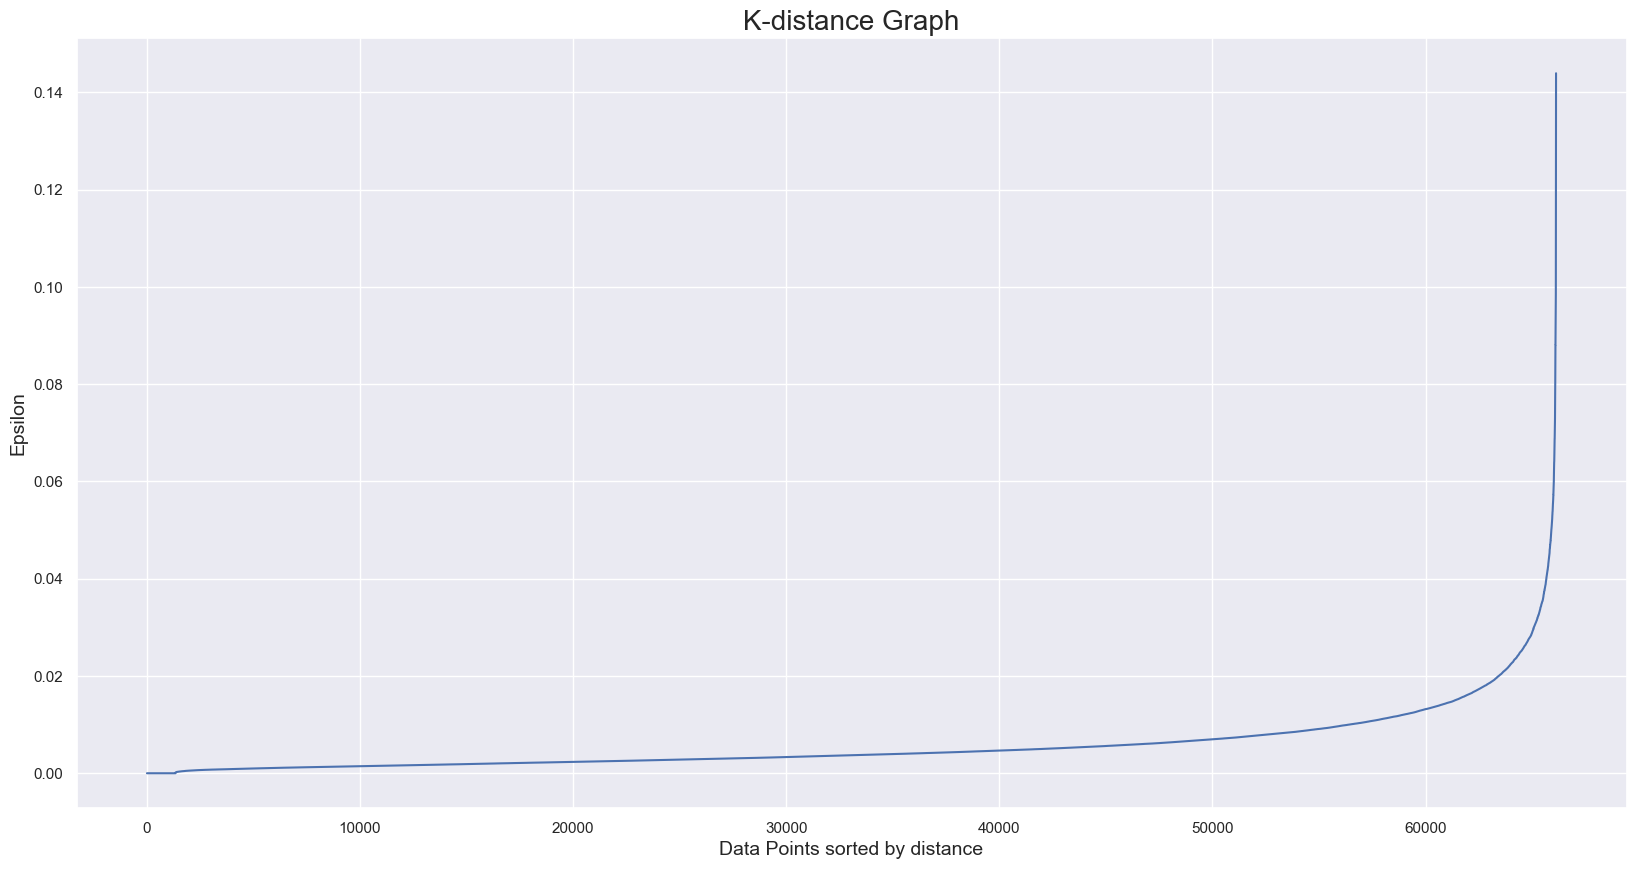

In [247]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

## K-distance graph Analysis is as Follows:

### Purpose of K-Distance Graph:
1. The K-distance graph helps identify an appropriate value for the epsilon (ε) parameter in DBSCAN.
2. Epsilon defines the maximum distance between data points to be considered neighbors within a cluster.

### Graph Analysis:
1. The x-axis represents data points sorted by their distance (proximity) to other points.
2. The y-axis represents the epsilon value.
3. The graph shows how the distance to the k-th nearest neighbor (k-distance) changes as we consider more neighbors.

### Observations:
1. Initially, the k-distance remains low and stable as we consider more neighbors (left side of the graph).
2. At a certain point (the “elbow” or “knee”), the k-distance starts increasing sharply.
3. This point indicates the optimal epsilon value for forming clusters.

### Interpretation:
1. The “elbow” point on the graph (around 60,000 data points) suggests an appropriate epsilon value.
2. Beyond this point, the increase in distance indicates a transition from dense clusters to sparse regions.

### Practical Implications:
1. Use the identified epsilon value to run DBSCAN with the appropriate neighborhood size.
2. Clusters formed by DBSCAN will be based on this epsilon, capturing both dense and sparse regions.
3. Adjust the epsilon value based on the desired level of granularity in your clustering.

In [248]:
df_X_3PC=pd.DataFrame(X_3PC)
# eps_list=np.arange(start=0.018, stop=0.021, step=0.001)
eps_list=[0.021]
# min_sample_list=[8,50,100,160,170,180,190,200,250,350]
min_sample_list=np.arange(start=161, stop=175, step=1)
# eps_list=[0.018]
# min_sample_list=[100]
# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()


In [249]:
My_Main_DBSCAN = DBSCAN(eps=0.021, min_samples=163)
My_Main_DBSCAN.fit(df_X_3PC)
My_Main_DBSCAN.labels_

array([-1, -1, -1, ...,  2,  2,  2], dtype=int64)

In [250]:
df_pca_DBSCAN=pd.concat([new_data.reset_index(drop=True),df_X_3PC],axis=1)
df_pca_DBSCAN.columns.values[-3:]=['PCA1','PCA2','PCA3']
df_pca_DBSCAN["Cluster"]=My_Main_DBSCAN.labels_
df_pca_DBSCAN

Avg_Invoice_Row_No  Waste_Rate  Rejected_Rate  Avg_Purchase_In_Month  \
0                    0.00        0.00           0.00                   0.00   
1                    0.00        0.00           0.00                   0.00   
2                    0.00        0.00           0.00                   0.00   
3                    0.00        0.00           0.00                   0.00   
4                    0.00        0.00           0.00                   0.00   
...                   ...         ...            ...                    ...   
66117                0.00        0.00           0.00                   0.00   
66118                0.00        0.00           0.00                   0.00   
66119                0.00        0.00           0.00                   0.00   
66120                0.00        0.00           0.00                   0.00   
66121                0.00        0.00           0.00                   0.00   

       age  recency  PCA1  PCA2  PCA3  Cluster  
0     7.51     7.32  0.28 -0.06  1.07       -1  
1     7.51     7.30  0.27 -0.06  1.05       -1  
2     7.48     7.29  0.31 -0.05  1.02       -1  
3     7.47     7.29  0.31 -0.05  1.02       -1  
4     7.46     7.32  0.33 -0.04  1.04       -1  
...    ...      ...   ...   ...   ...      ...  
66117 6.72     6.64  0.96  0.13  0.01        2  
66118 6.72     6.64  0.96  0.13  0.01        2  
66119 6.72     6.64  0.96  0.13  0.01        2  
66120 6.72     6.64  0.96  0.13  0.01        2  
66121 6.72     6.64  0.96  0.13  0.01        2  

[66122 rows x 10 columns]

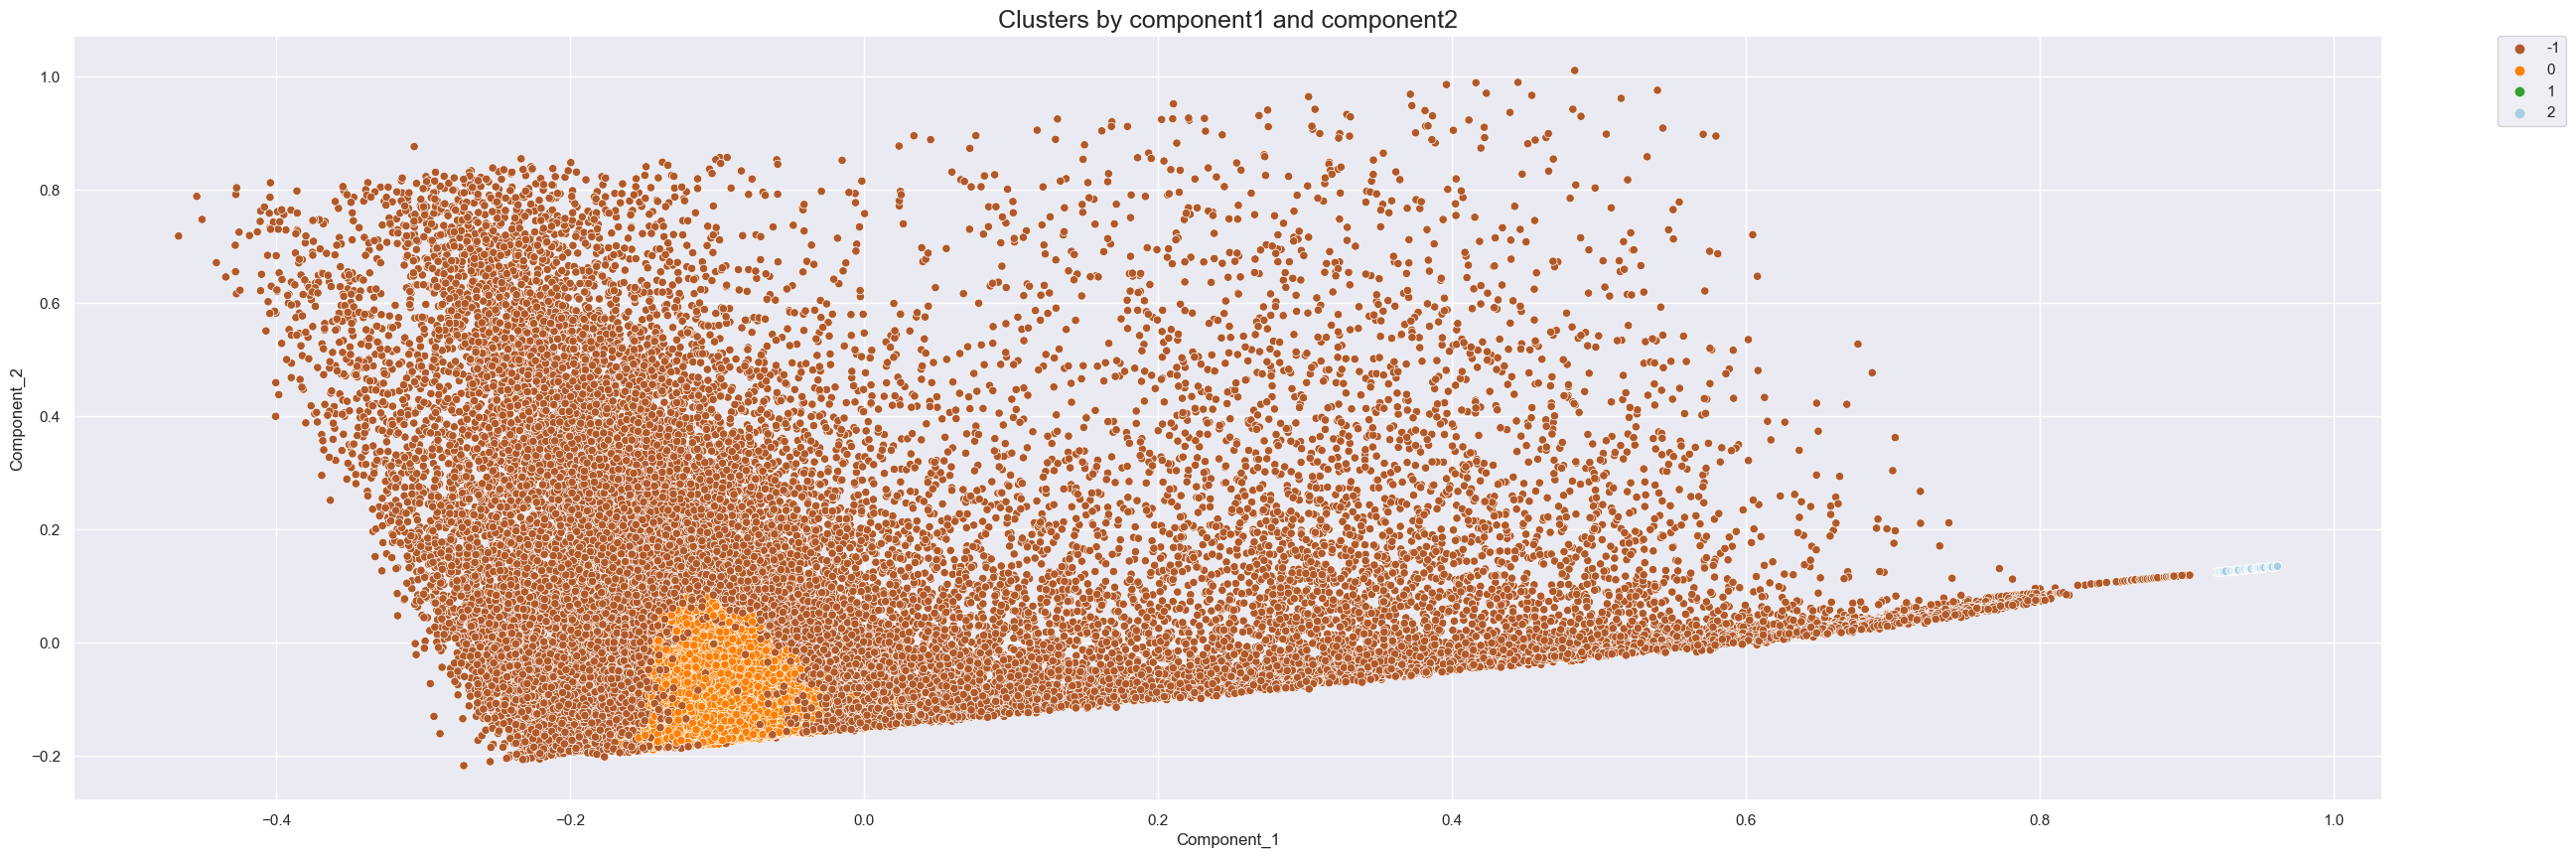

In [251]:
sns.scatterplot(
    data=df_pca_DBSCAN,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Paired_r'
    )

plt.title("Clusters by component1 and component2", fontsize=18)
plt.xlabel('Component_1')
plt.ylabel('Component_2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

## The scatter plot resulting from DBSCAN clustering using Component 1 and Component 2:

### Cluster Separation:
1. The scatter plot shows data points colored according to their assigned clusters by DBSCAN.
2. Each cluster is represented by a different color, making it easier to identify distinct groups.

## Cluster Characteristics:

### Brown Cluster (C1):
1. This is the largest cluster, covering a wide range of Component 1 and Component 2 values.
2. Data points in this cluster share similar characteristics.

### Yellow Cluster (C2):
1. A smaller cluster located towards the center-left of the plot.
2. It represents a distinct subgroup with unique features.
3. The tight grouping suggests strong similarity among these data points.

### Interpretation:
1. Component 1 and Component 2 play a significant role in separating the clusters.
2. The brown cluster (C1) dominates the plot, while the yellow cluster (C2) stands out as a separate group.
3. The yellow cluster may represent specific behaviors or patterns within the data.

### Practical Implications:
1. Investigate the features associated with each cluster to understand their relevance.
2. Consider using the identified clusters for targeted marketing or personalized strategies.
3. Further analysis of the yellow cluster can provide insights into its distinct characteristics.

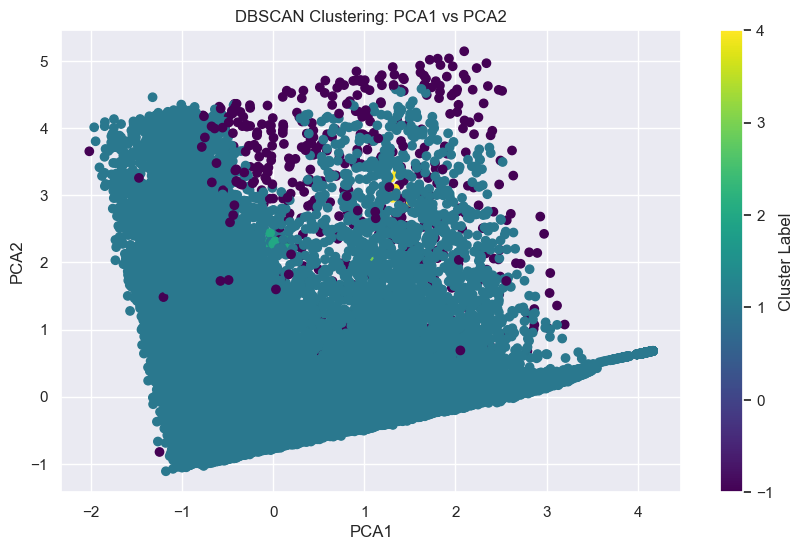

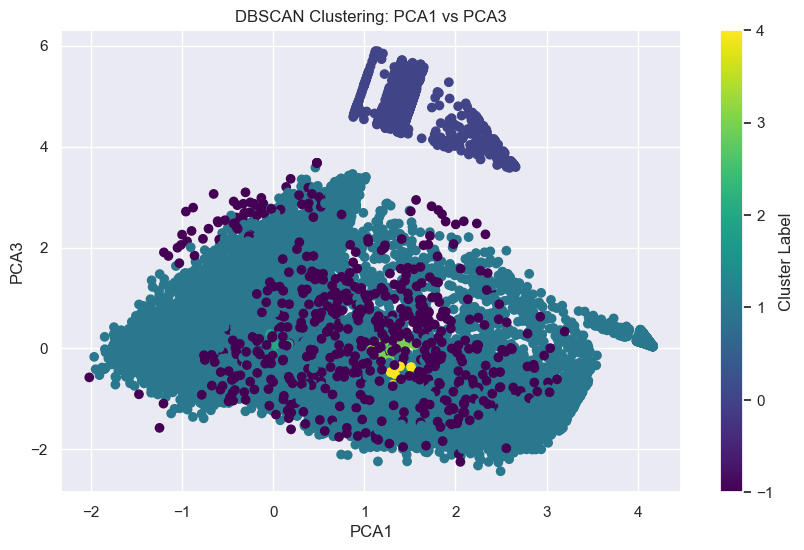

In [252]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming you have already preprocessed your data and have the features (PCA1, PCA2, PCA3)
features = df_pca_Kmeans[['PCA1', 'PCA2', 'PCA3']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjust parameters as needed
dbscan.fit(features_scaled)

# Get cluster labels
cluster_labels = dbscan.labels_

# Create scatter plot for PCA1 vs PCA2
plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('DBSCAN Clustering: PCA1 vs PCA2')
plt.colorbar(label='Cluster Label')
plt.show()

# Create scatter plot for PCA1 vs PCA3
plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 2], c=cluster_labels, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.title('DBSCAN Clustering: PCA1 vs PCA3')
plt.colorbar(label='Cluster Label')
plt.show()


## DBSCAN clustering results using the scatter plots for PCA1 vs PCA2 and PCA1 vs PCA3:

### DBSCAN Clustering: PCA1 vs PCA2:
1. The scatter plot shows data points in a two-dimensional space defined by PCA1 (x-axis) and PCA2 (y-axis).
2. Each data point is colored according to its assigned cluster label.

### Observations:
1. The majority of data points belong to one large cluster (brown).
2. Some data points are more tightly grouped, forming distinct subclusters.
3. The brown cluster dominates the plot, while the subclusters are scattered around it.

### Practical Implications:
1. The brown cluster likely represents a common pattern or behavior shared by most data points.
2. The subclusters (smaller groups) may indicate specific subgroups with unique characteristics.

## DBSCAN Clustering: PCA1 vs PCA3:
1. Similar to the first plot, but now PCA3 is used as the y-axis.
2. The distinct clusters are more pronounced in this plot.
3. The separation between clusters is clearer, suggesting that PCA3 provides better separation among clusters than PCA2.

### Practical Implications:
1. Investigate the features associated with each cluster to understand their relevance.
2. Consider using these clusters for targeted marketing or personalized strategies.

# Comparsion Between K-means, Agglomerative and DBSCAN

## K-means Clustering:
### Methodology:
1. Centroid-based or partition-based clustering algorithm.
2. Partitions data into K distinct, non-overlapping clusters.
3. Iteratively assigns data points to the nearest centroid.

### Strengths:
1. Efficient for large datasets.
2. Simple and easy to implement.

### Limitations:
1. Sensitive to the number of clusters specified.
2. Doesn’t handle outliers well.
3. Memory Usage: Moderate
4. Execution Time: Fast

## Agglomerative Hierarchical Clustering:

### Methodology:
1. Builds a hierarchy of clusters by recursively merging or agglomerating data points.
2. Forms a tree-like structure (dendrogram).

### Strengths:
1. Captures hierarchical relationships.
2. No need to specify the number of clusters in advance.

### Limitations:
1. Computationally expensive for large datasets.
2. Sensitive to noise and outliers.
3. Memory Usage: High
4. Execution Time: Moderate to slow

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

### Methodology:
1. Density-based clustering algorithm.
2. Forms clusters based on data density within a specified radius.
3. Efficiently handles outliers and noise.

### Strengths:
1. Arbitrary cluster shapes.
2. Robust to noise.

### Limitations:
1. Struggles with high-dimensional datasets.
2. Requires tuning of parameters (epsilon and min_samples).
3. Memory Usage: Moderate
4. Execution Time: Moderate

### In summary:
1. K-means is efficient and simple but sensitive to the number of clusters.
2. Agglomerative clustering captures hierarchy but is computationally expensive.
3. DBSCAN handles noise well and forms arbitrary-shaped clusters.